<a href="https://colab.research.google.com/github/AttilaKovacs-UA/attilakovacs-ua.github.io/blob/main/WVO_roof_tiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environmentally friendly roofing tiles with waste vegetable oil binder

In [ ]:
#Set up Google Colab and Drive folders

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Work/Projects/Vege_ML')

## Introduction

## About the dataset

### Overview

This dataset contains information about the production parameters and the measured flexural stress of biomaterial-based roofing tiles.
The source research summarizes  the goals as follows:
"A novel methodology of roofing tiles production with vegetable oil i.e. edible oil of any type is proposed which does not require the use of any form of cementitious, pozzolanic materials or water. This novel technology will contribute to a great extent in achieving Malaysia’s target of greenhouse
emissions reduction. The manufacturing steps include the mixing of appropriate amount of vegetable oil (either virgin, oxidized or catalyzed) with
aggregates followed by compaction and heat curing. Environmentally friendly production due to lower energy requirements and eliminating the waste
disposal problems are the distinctive outcomes of this technique."

### Source

- **Name**: Utilization of catalyzed waste vegetable oil as a binder for the production of environmentally friendly roofing tiles
- **Authors**: Humayun Nadeem, Noor Zainab Habib, Choon Aun Ng, Salah Elias Zoorob, Zahiraniza Mustaffa, Swee Yong Chee, Muhammad Younas
- **URL**: https://doi.org/10.1016/j.jclepro.2017.01.028

### Purpose

- The dataset summarizes a set of exmperiments where the goal was to optimize the flexural stress of vegatble oil based roofing tiles by altering the production parameters and composition of the tile.
- These properties are assumed to be relevant to final structural strength of the tile, which was measured by the flexural stress.
- The goal is to identifiy the most significant production parameters which determine the structural strength of the vege tile, and then used these properties in a supervised regression machine learning model to predict the optimal composition and production parameters of the vege tile, which facilitate maximal flexural stress.

### Data Information

This section provides detailed information about the dataset, such as the number of instances, features, and data types.

## Data description

### Dataset properties

In [ ]:
#Imprt packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading the dateset:
data = pd.read_excel("vegetile_data.xlsx")

#Show the properties of the variables:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sand                 253 non-null    int64  
 1   Filler               253 non-null    int64  
 2   Oil-to-Mixture       253 non-null    float64
 3   Catalyst-to-Mixture  253 non-null    int64  
 4   Temperature          253 non-null    int64  
 5   Compaction blows     253 non-null    int64  
 6   Curing time          253 non-null    float64
 7   Blending time        253 non-null    int64  
 8   Storage time         253 non-null    int64  
 9   Flexural Stress      253 non-null    float64
 10  Water Absorption     253 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 21.9 KB


#### General Statistics

- **Number of Instances**: 253
- **Number of Features**: 11
- **Target Variables**: Flexural Stress, Water Absorption

#### Features

List the features (columns) in the dataset along with their data types.

1. **Sand**: The amount of sand in the vege-tile expressed as percentage of the sand+filler content.
2. **Filler**: The amount of filler in the vege-tile expressed as percentage of the sand+filler content.
3. **Oil-to-mixture**: The oil content of the mixture expressed as mass percentage of the solid content.
4. **Catalyst**: The amount of the catalyst in the vege-tile expressed as mass percentage of the oil content.
5. **Temperature**: The temperature of the curing of vege-tiles expressed as Celsius degree.
6. **Compaction blows**: Number of compaction blows in the vege-tile production.
7. **Curing time**: Curing time of the compacted vege-tile expressed as hours.
8. **Blending time**: The blending time of the the vegetable oil and catalyst expressed as minutes.
9. **Storage time**: The storage time of the catalyzed waste oil expressed as days.

#### Target Variable

- **Name**: Flexural Stress
- **Type**: Float
- **Description**: The flexural stress before destruction of the vege-tile sample expressed as MPa.
- **Distribution**: N.A.

- **Name**: Water absorption
- **Type**: Float
- **Description**: The water absorption of the vege-tile sample based on the ASTM C 1492-03 expressed as percentage of the dry tile.
- **Distribution**: N.A.

## Descriptive statistics of the dataset

In [ ]:
#Basic descriptive statistics of the dataset:
data.describe()

,Sand,Filler,Oil-to-Mixture,Catalyst-to-Mixture,Temperature,Compaction blows,Curing time,Blending time,Storage time,Flexural Stress,Water Absorption
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.0,253.000000,253.000000,253.000000,253.000000,253.000000
mean,63.675889,36.324111,7.355731,3.794466,190.948617,10.0,2.396245,17.549407,0.197628,7.926206,2.858443
std,5.903128,5.903128,0.891949,4.076312,2.936046,0.0,2.690281,49.311958,0.745672,2.653697,1.298683
min,50.000000,15.000000,5.000000,0.000000,190.000000,10.0,0.150000,5.000000,0.000000,0.000000,0.000000
25%,65.000000,35.000000,7.000000,0.000000,190.000000,10.0,0.750000,5.000000,0.000000,7.120000,2.130000
50%,65.000000,35.000000,7.000000,3.000000,190.000000,10.0,0.750000,5.000000,0.000000,8.180000,2.560000
75%,65.000000,35.000000,7.000000,5.000000,190.000000,10.0,5.000000,10.000000,0.000000,9.830000,3.230000
max,85.000000,50.000000,10.000000,18.000000,200.000000,10.0,10.000000,320.000000,4.000000,11.530000,7.560000


The desccriptive statistics show that the 'Compaction blows' feature is a static value, thus no predictive value.
The 'Temperature' feature has very little variance compared to the mean value.

In [ ]:
#Missing values in the dataset:
missing_values = data.isnull().sum()
print(missing_values)

Sand                   0
Filler                 0
Oil-to-Mixture         0
Catalyst-to-Mixture    0
Temperature            0
Compaction blows       0
Curing time            0
Blending time          0
Storage time           0
Flexural Stress        0
Water Absorption       0
dtype: int64


There are no missing values in the dataset, no strategy for handling missing data was implemented.

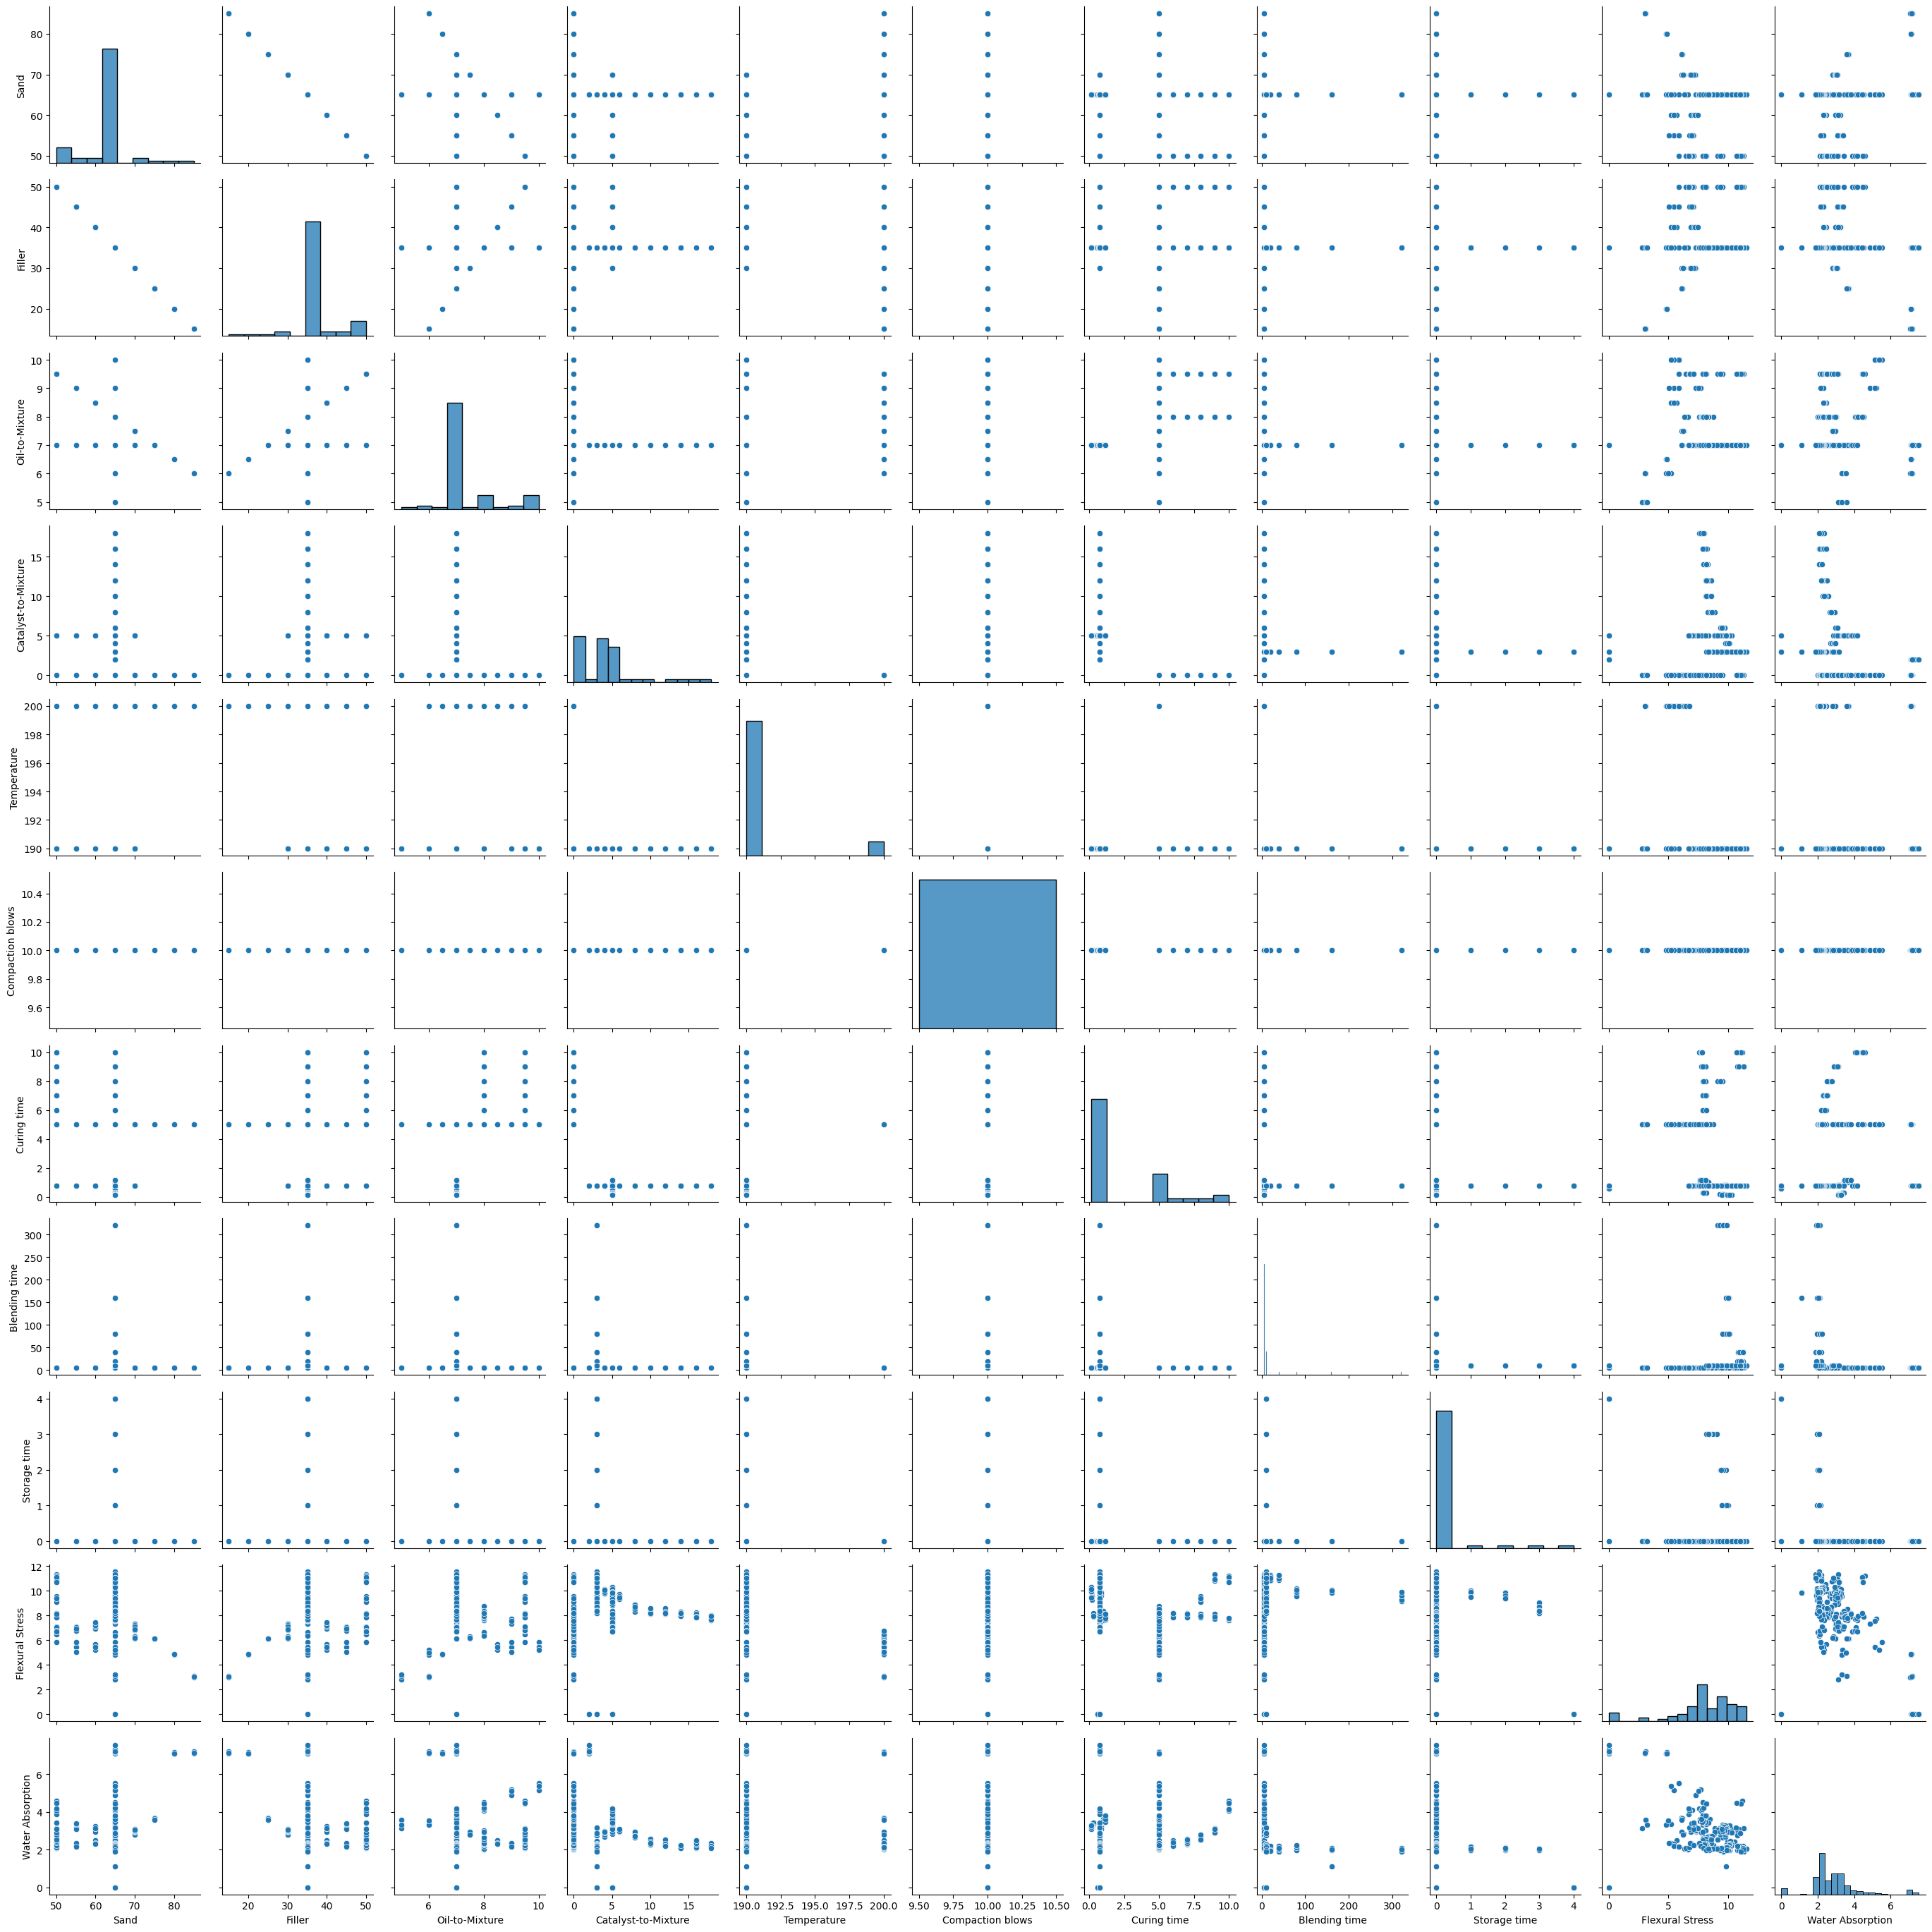

In [ ]:
#Visualization of the pair-wise feature relation:
sns.pairplot(data)
plt.tight_layout()
plt.savefig('description.png', dpi=300)

The pairplot shows that the datadistribution is not normal.
In most of the cases the variable was kept on a constant value and was only tested for other values, keeping all the other variables constant.
This is a limitation of the dataset, as the oringinal design of experience did not consider the use of statistical learning later.
'Filler' and 'Sand' are inversely related, so one of them can already be taken out.
Only two temperature value were tested in the epxerinemts, the 'Temperature' will have little predictive value, assuming a complex relation between the input and output variables.
Apart from these, no clear trends can be observed in the dataset. Probaly linear models will not work.
More complex feature engineering might be necessary.
Flexural stress gives a wide distribution.
Immediate descruction of the tile is registered as 0 value flexural stress, this might have to be removed from the dataset to prevent additional artifacts in the model.

In [ ]:
#Calculating the correclation matrix of the Flexural stress with the features:
corr_matrix=data.corr()
corr_matrix["Flexural Stress"].sort_values(ascending=False)

Flexural Stress        1.000000
Blending time          0.175134
Filler                 0.127196
Catalyst-to-Mixture    0.104658
Oil-to-Mixture         0.067223
Curing time           -0.109803
Sand                  -0.127196
Water Absorption      -0.185022
Storage time          -0.248409
Temperature           -0.297128
Compaction blows            NaN
Name: Flexural Stress, dtype: float64

In [ ]:
#Calculating the correclation matrix of the Flexural stress with the features:
corr_matrix["Water Absorption"].sort_values(ascending=False)

Water Absorption       1.000000
Curing time            0.249612
Sand                   0.216873
Temperature            0.210094
Oil-to-Mixture         0.008976
Blending time         -0.174816
Flexural Stress       -0.185022
Filler                -0.216873
Catalyst-to-Mixture   -0.222336
Storage time          -0.334634
Compaction blows            NaN
Name: Water Absorption, dtype: float64

The correlation matrix does no show strong linear correlation between the features and the target variables.
This indicates than linear morels will not work well.
Therefore the applicaiton of more complex regression models is justified.

## Feature selection

Since 'compaction blows' and 'temperature' have little variation, they were removed from the considered input variables.
Since 'Sand' and 'Filler' are inversely correlated, 'Filler' was also removed.
A preliminary test of the remaining features is performed with a random forest regressor model on the complete dataset to determine the global feature importance of the Scikit-Learn library.
The global feature importance is calculated based on how many times a given feature was selected for a split and at what rank (level) among all available features (candidates) in the trees of the random forest.
A random variable was also added to see how the information gain of the different features is related to a variable that has no predictive information.
The calculation was done for both target variables (flexural stress and water absorption).
The dataset was cleaned of instances with zero flexural stress, as these samples broke before measurement.

In [ ]:
#Import packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading the dateset
data = pd.read_excel("vegetile_data.xlsx")
#Removing zero flexural stress values from the dataset as these samples were destroyed before actual measurement:
data_nozero = data[data["Flexural Stress"] != 0]

#Selecting input and output variables, remove low variance and redundant varaiables from the input variables:
data_input = data_nozero.loc[:, ~data.columns.isin(["Flexural Stress","Water Absorption",'Filler','Temperature', 'Compaction blows'])]

#Scaling the input variables:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data_input = pd.DataFrame(min_max_scaler.fit_transform(data_input), columns=data_input.columns)

#'Oil-to-Mixture',
data_output_stress = data_nozero["Flexural Stress"]
data_output_water = data_nozero['Water Absorption']

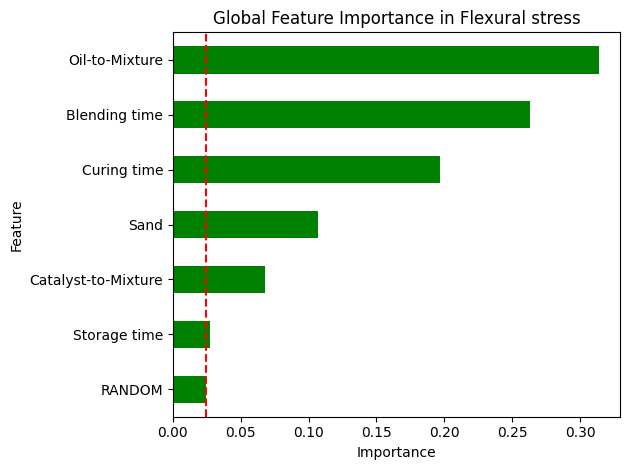

In [ ]:
#Global feature importance calculation for Flexural Stress:

#import and setup the random forest regressor model:
from sklearn.ensemble import RandomForestRegressor
model_rfr_importance = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, min_samples_leaf=2)

#add random variable to the dataset
data_input["RANDOM"] = np.random.RandomState(42).randn(data_input.shape[0])

#run the random forest regressor on the dataset:
model_rfr_importance.fit(data_input, data_output_stress)

#plot the feature importance:
global_importances_random = pd.Series(model_rfr_importance.feature_importances_, index=data_input.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
global_importances_random.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance in Flexural stress")
plt.axvline(x=global_importances_random['RANDOM'], color='red', linestyle='--')
plt.tight_layout()
plt.savefig('feature_stress.png', dpi=300)

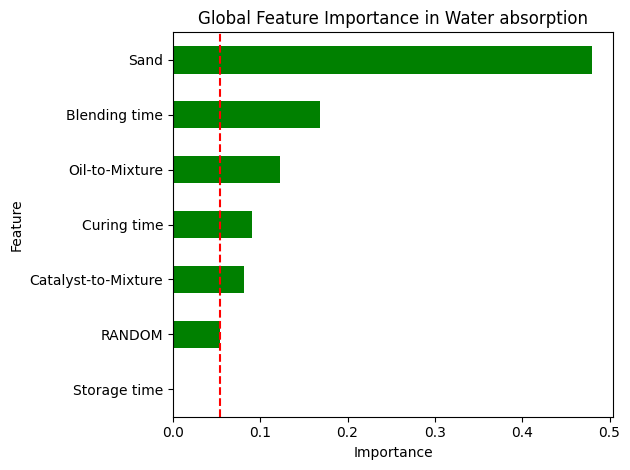

In [ ]:
#Global feature importance calculation for Water absorption:

#import and setup the random forest regressor model:
from sklearn.ensemble import RandomForestRegressor
model_rfr_importance = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, min_samples_leaf=2)

#add random variable to the dataset
data_input["RANDOM"] = np.random.RandomState(42).randn(data_input.shape[0])

#run the random forest regressor on the dataset:
model_rfr_importance.fit(data_input, data_output_water)

#plot the feature importance:
global_importances_random = pd.Series(model_rfr_importance.feature_importances_, index=data_input.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
global_importances_random.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance in Water absorption")
plt.axvline(x=global_importances_random['RANDOM'], color='red', linestyle='--')
plt.tight_layout()
plt.savefig('feature_water.png', dpi=300)

In the case of the 'Flexural Stress' target, the tested features showed added information value with the exception of the 'Storage time'.
In the case of the 'Water Absorption' target, 'Storage time', had no impact on the prediction. All other features showed added predictive value to the model, in the case of flexural stress oil-to-mixture, blending time and curing time have outstanding contribution, while in case of water absorption the sand stands out.

## Machine learning models

### Data preprocessing

- **Handling Missing Values**: N.A.
- **Feature Scaling**: MinMaxScaler between 0 and 1
- **Categorical Encoding**: N.A.
- **Other Transformations**: 0 Stress values are removed, 'Filler', 'Compaction blows', 'Storage time' and 'Temperature' features are removed.

First, based on the descriptive statistics and the feature importance analysis, the unnecessary features and zero value instances are removed.
Then, the input features are scaled to [0,1] range to accelerate the training process in the later steps.

In [ ]:
#Removing unnecessary features and scaling data:

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#Set up the scaler:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

#Loading and clearning the dataset, scaling the input features:
data = pd.read_excel("vegetile_data.xlsx")
data_nozero = data[data["Flexural Stress"] != 0]
data_input = data_nozero.loc[:, ~data.columns.isin(["Flexural Stress","Water Absorption",'Filler','Temperature', 'Compaction blows', 'Storage time'])]
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data_input = pd.DataFrame(min_max_scaler.fit_transform(data_input), columns=data_input.columns)
data_output_stress = data_nozero["Flexural Stress"]
data_output_water = data_nozero['Water Absorption']
#Description of the final cleaned, scaled dataset:
data_input.describe()

,Sand,Oil-to-Mixture,Catalyst-to-Mixture,Curing time,Blending time
count,238.000000,238.00000,238.000000,238.000000,238.000000
mean,0.388355,0.47563,0.212418,0.238899,0.042017
std,0.173639,0.18302,0.232772,0.278065,0.161164
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.428571,0.40000,0.000000,0.060914,0.000000
50%,0.428571,0.40000,0.166667,0.060914,0.000000
75%,0.428571,0.47500,0.277778,0.492386,0.011905
max,1.000000,1.00000,1.000000,1.000000,1.000000


Next, the dataset is splitted into traning and test set in 85/15 ratio.
The relatively large training ratio is necessary due to the small dataset.

In [ ]:
#Split the data into train and test sets:

#Import train-test-split package:
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing dataset:
data_input_train, data_input_test, data_output_stress_train, data_output_stress_test, data_output_water_train, data_output_water_test = train_test_split(data_input, data_output_stress, data_output_water, test_size=0.15, random_state=42)

#Check the size of the training and test set:
print(len(data_input_train))
print(len(data_input_test))
data_input_train.describe()


202
36


,Sand,Oil-to-Mixture,Catalyst-to-Mixture,Curing time,Blending time
count,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.386139,0.476238,0.218922,0.240112,0.038111
std,0.179172,0.184012,0.235092,0.284095,0.145653
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.428571,0.400000,0.000000,0.060914,0.000000
50%,0.428571,0.400000,0.166667,0.060914,0.000000
75%,0.428571,0.400000,0.277778,0.492386,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


The datasets are saved separately so these prepared subsets can be used in the later steps.

In [ ]:
#Save the training and test sets:

datasets = {
    "data_input_train": data_input_train,
    "data_input_test": data_input_test,
    "data_output_stress_train": data_output_stress_train,
    "data_output_stress_test": data_output_stress_test,
    "data_output_water_train": data_output_water_train,
    "data_output_water_test": data_output_water_test
}
for var_name, var_value in datasets.items():
    var_value.to_csv(var_name+'.csv', index=False)

#data_input_train.to_csv(str(str(datasets[0])+'.csv'), index=False)
#data_input_test.to_csv('data_input_test.csv', index=False)
#data_output_stress_train.to_csv('data_output_stress_train.csv', index=False)
#data_output_stress_test.to_csv('data_output_stress_test.csv', index=False)
#data_output_water_train.to_csv('data_output_water_train.csv', index=False)
#data_output_water_test.to_csv('data_output_water_test.csv', index=False)


### Preliminary models

#### Flexural stress

##### Random forest regressor

Random forests are robust, versatile and computationally efficient models. It is a good start to see the potential of the underlying data before further model optimization.
The average absolute relative error, root mean squared error and the coefficient of determination are determined in a 10-fold cross validation on the training dataset.

RMSE:
Mean: 0.5951171938522933
Standard deviation: 0.09574529935550087
AARD:
Mean: 0.06012486727942491
Standard deviation: 0.017711396756366283
R^2:
Mean: 0.8623517857513523
Standard deviation: 0.06642660924070068


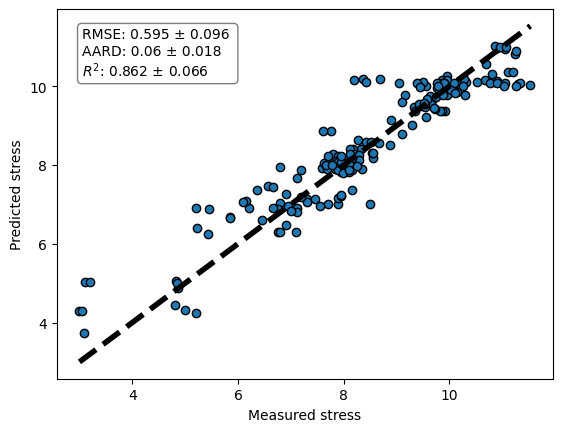

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()


model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=15, min_samples_leaf=2)
aard = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_mean_absolute_percentage_error', cv=10)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_stress_train, scoring='r2', cv=10)
rmse = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = -rmse

print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_stress_train, cv=10)

metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_stress_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_stress_train.min(), data_output_stress_train.max()], [data_output_stress_train.min(), data_output_stress_train.max()], "k--", lw=4)
ax.set_xlabel("Measured stress")
ax.set_ylabel("Predicted stress")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)

#plt.show()
plt.draw()










The average error of the model is about 0.595 MPa, while the coefficient of determination is 0.862. These values indicate an acceptable fit prior to model optimization.
The standard deviation on these metrics, however, are relatively high (0.095 and 0.066) related to the deviation between the different cross-validation step, which indicates overfitting.

##### Multilayer perceptron

MLP is a basic neural network model. It is also a versatile model, but it is more computationally intensive and fine-tuning the hyperparameters is more work plus the model is also more sensitive for these.

RMSE:
Mean: 0.6823486075201514
Standard deviation: 0.13644716196003875
AARD:
Mean: 0.06367217644736523
Standard deviation: 0.0136120428662446
R^2:
Mean: 0.7997382004809006
Standard deviation: 0.12693132221125966


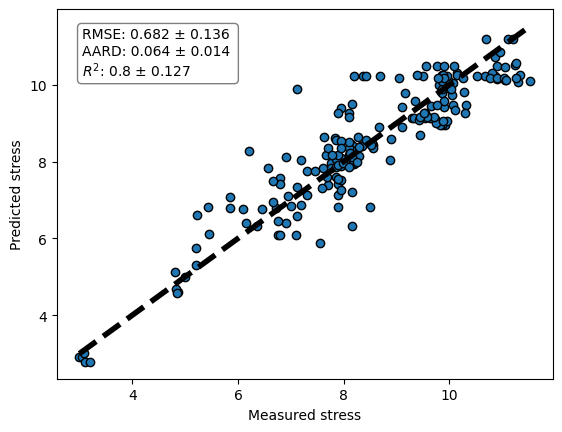

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()


model = MLPRegressor(random_state=42, max_iter=5000, hidden_layer_sizes=(10, 8, 5), activation='relu', solver='lbfgs')
aard = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_mean_absolute_percentage_error', cv=10)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_stress_train, scoring='r2', cv=10)
rmse = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = -rmse

print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_stress_train, cv=10)

metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_stress_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_stress_train.min(), data_output_stress_train.max()], [data_output_stress_train.min(), data_output_stress_train.max()], "k--", lw=4)
ax.set_xlabel("Measured stress")
ax.set_ylabel("Predicted stress")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()

The results show a 0.682 MPa error int he predictions and a relatively low coefficient of determination of 0.800.
The results are less accurate than of the random forest and the computation takes longer, however as an alternative it will be tested in the next step of hyperparameter tuning and contstraining the model.
This is beacuse with the MLP model, higher increase in accuracy is expected with the fine tuning of the hpyerparameters.

#### Water absorption

##### Random forest regressor

Random forests are robust, versatile, and computationally efficient models. It is a good start to see the potential of the underlying data before further model optimization.
Mean absolute relative error, root mean square error, and coefficient of determination are determined in a 10-fold cross-validation on the training data set.

RMSE:
Mean: 0.3502914284444231
Standard deviation: 0.09889258165227517
AARD:
Mean: 0.07797136626788334
Standard deviation: 0.02198928264034109
R^2:
Mean: 0.8506979944186085
Standard deviation: 0.10383917750220319


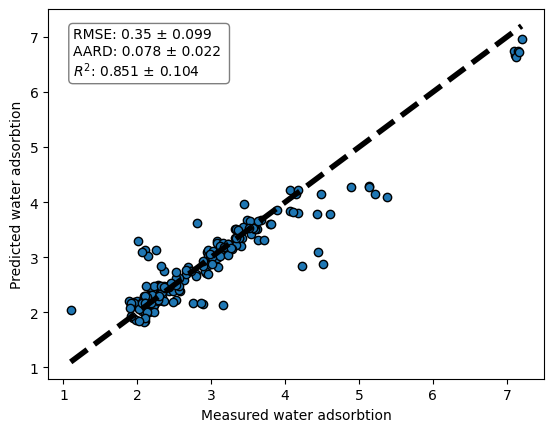

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()


model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=15, min_samples_leaf=2)
aard = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_mean_absolute_percentage_error', cv=10)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_water_train, scoring='r2', cv=10)
rmse = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = -rmse

print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_water_train, cv=10)

metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_water_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_water_train.min(), data_output_water_train.max()], [data_output_water_train.min(), data_output_water_train.max()], "k--", lw=4)
ax.set_xlabel("Measured water adsorbtion")
ax.set_ylabel("Predicted water adsorbtion")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()

The average error of the model is about 0.350 mass%, while the coefficient of determination is 0.851. These values indicate an acceptable fit prior to model optimization.
The standard deviation on these metrics, however, are relatively high (0.099 and 0.103) related to the deviation between the different cross-validation step, which indicates overfitting.

##### Multilayer perceptron

MLP is a basic neural network model. It is also a versatile model, but it is more computationally intensive and fine-tuning the hyperparameters is more work plus the model is also more sensitive for these.

RMSE:
Mean: 0.6786369240908534
Standard deviation: 0.7685869143559856
AARD:
Mean: 0.1289727730578875
Standard deviation: 0.08261433763837904
R^2:
Mean: 0.06563764822573609
Standard deviation: 2.1007277731789524


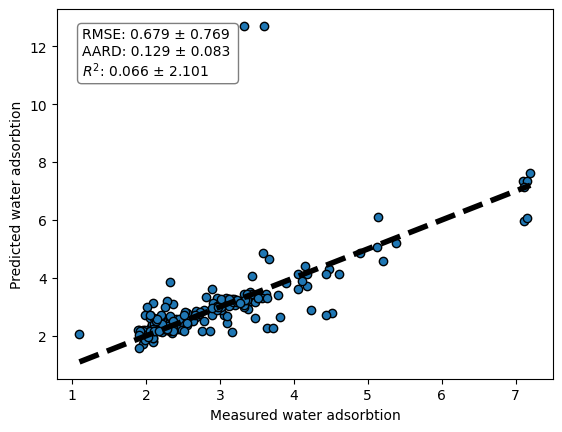

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()


model = MLPRegressor(random_state=42, max_iter=5000, hidden_layer_sizes=(10, 8, 5), activation='relu', solver='lbfgs')
aard = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_mean_absolute_percentage_error', cv=10)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_water_train, scoring='r2', cv=10)
rmse = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = -rmse

print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_water_train, cv=10)
metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_water_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_water_train.min(), data_output_water_train.max()], [data_output_water_train.min(), data_output_water_train.max()], "k--", lw=4)
ax.set_xlabel("Measured water adsorbtion")
ax.set_ylabel("Predicted water adsorbtion")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()

The results show a 0.679 mass% error in the predictions. The 0.066 coefficient of determination is likely an artifact due thte few outlier values in the predictions. This is also the reason behind the high deviation between the folds.
However, the plot of the results shows good potential in the model, therefore we it will be tested in the next step of hyperparameter tuning and contstraining the model. This is beacuse with the MLP model, higher increase in accuracy is expected with the fine tuning of the hpyerparameters.

### Hyperparameter optimization

#### Flexural stress

##### Random forest regressor

First, the number of trees in the random forest (n_estimators), the number of decisions in one tree (max_depth) and the minimal number of instances, which can be on a single leaf (min_samples_leaf) are optimized by random search among these parameters.

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()

#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter search space:
param_dist = {
    'n_estimators': [25, 50, 100, 150, 200, 250],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [2, 3, 4, 5],
}

# Define the random forest regressor model:
model = RandomForestRegressor(random_state=42)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=10, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_stress_train)

# Get the best hyperparameters
best_params_RF_stress = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_RF_stress)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'n_estimators': 25, 'min_samples_leaf': 2, 'max_depth': 20}


,params,mean_test_score
0,"{'n_estimators': 100, 'min_samples_leaf': 3, '...",-0.449353
1,"{'n_estimators': 250, 'min_samples_leaf': 2, '...",-0.363997
2,"{'n_estimators': 50, 'min_samples_leaf': 2, 'm...",-0.358491
3,"{'n_estimators': 200, 'min_samples_leaf': 5, '...",-0.612694
4,"{'n_estimators': 150, 'min_samples_leaf': 3, '...",-0.456146
5,"{'n_estimators': 50, 'min_samples_leaf': 3, 'm...",-0.440573
6,"{'n_estimators': 150, 'min_samples_leaf': 5, '...",-0.615350
7,"{'n_estimators': 25, 'min_samples_leaf': 5, 'm...",-0.607307
8,"{'n_estimators': 25, 'min_samples_leaf': 2, 'm...",-0.654414
9,"{'n_estimators': 200, 'min_samples_leaf': 3, '...",-0.643351


from matplotlib import pyplot as plt
_df_16['mean_test_score'].plot(kind='hist', bins=20, title='mean_test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['mean_test_score'].plot(kind='line', figsize=(8, 4), title='mean_test_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()

#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter search space:
param_dist = {
    'n_estimators': [25, 50, 100, 150, 200, 250],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [2, 3, 4, 5],
}

# Define the random forest regressor model:
model = RandomForestRegressor(random_state=42)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=10, scoring='neg_mean_squared_error', random_state=1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_stress_train)

# Get the best hyperparameters
best_params_RF_stress = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_RF_stress)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

The model trained with the hyperparameters: {'n_estimators': 25, 'min_samples_leaf': 2, 'max_depth': 20}
RMSE:
Mean: 0.5855845885183613
Standard deviation: 0.10022479889487748
AARD:
Mean: 0.05930321568831998
Standard deviation: 0.01900760158928014
R^2:
Mean: 0.8681153650055959
Standard deviation: 0.06017684345009633


['random_forest_model_stress.pkl']

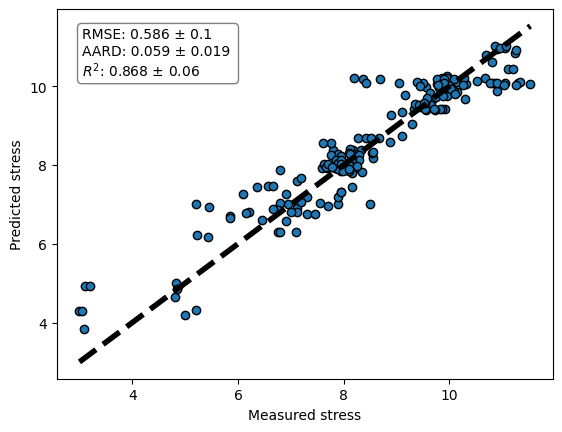

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
import joblib

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()

model = RandomForestRegressor(random_state=42, **best_params_RF_stress)
aard = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_mean_absolute_percentage_error', cv=10)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_stress_train, scoring='r2', cv=10)
rmse = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = -rmse
print('The model trained with the hyperparameters:', best_params_RF_stress)
print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_stress_train, cv=10)

metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_stress_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_stress_train.min(), data_output_stress_train.max()], [data_output_stress_train.min(), data_output_stress_train.max()], "k--", lw=4)
ax.set_xlabel("Measured stress")
ax.set_ylabel("Predicted stress")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()

#Save the model:
joblib.dump(model, 'random_forest_model_stress.pkl')

The standard derivation of  R2 is an order of magnitude lower thatn the mean value, while the standard deviation of the RMSE and AARD is 15 and 30 % of the mean, which is relatively high.

##### Multilayer perceptron

In the MLP regressor, the layout of the neural network, applied search algorithm, activation function and learning rate are optimized in a random search.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()


#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter search space:
param_dist = {
    'hidden_layer_sizes': [(8, 5, 3), (10, 6, 4), (12, 8, 5), (10, 8, 5, 3), (12, 10, 6, 4), (14, 12, 8, 5)],  # Example values for hidden layer sizes
    'activation': ['relu', 'tanh', 'logistic'],
    'solver':['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.0001, 0.1),  # Example range for regularization strength
    'learning_rate_init': uniform(0.001, 0.01),  # Example range for initial learning rate
}

# Define the multi-layer perceptron regressor model:
model = MLPRegressor(random_state=42, max_iter=5000)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_stress_train)

# Get the best hyperparameters
best_params_MLP_stress = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_MLP_stress)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'activation': 'tanh', 'alpha': 0.06160072266991698, 'hidden_layer_sizes': (14, 12, 8, 5), 'learning_rate_init': 0.004586467812961639, 'solver': 'lbfgs'}


,params,mean_test_score
0,"{'activation': 'logistic', 'alpha': 0.07975429...",-3.816467
1,"{'activation': 'logistic', 'alpha': 0.04468327...",-4.609113
2,"{'activation': 'logistic', 'alpha': 0.00215844...",-3.170280
3,"{'activation': 'tanh', 'alpha': 0.000177876584...",-3.184518
4,"{'activation': 'tanh', 'alpha': 0.000806630521...",-1.177803
...,...,...
95,"{'activation': 'relu', 'alpha': 0.073264775529...",-3.167831
96,"{'activation': 'logistic', 'alpha': 0.09317573...",-1.742994
97,"{'activation': 'relu', 'alpha': 0.074090876044...",-3.169871
98,"{'activation': 'relu', 'alpha': 0.050625237244...",-3.167831


The model trained with the hyperparameters: {'activation': 'tanh', 'alpha': 0.06160072266991698, 'hidden_layer_sizes': (14, 12, 8, 5), 'learning_rate_init': 0.004586467812961639, 'solver': 'lbfgs'}
RMSE:
Mean: 0.5423877420045088
Standard deviation: 0.09231279750428306
AARD:
Mean: 0.04560654253200656
Standard deviation: 0.008106618169219372
R^2:
Mean: 0.888998606393079
Standard deviation: 0.0638275986619513


AttributeError: 'MLPRegressor' object has no attribute 'coefs_'

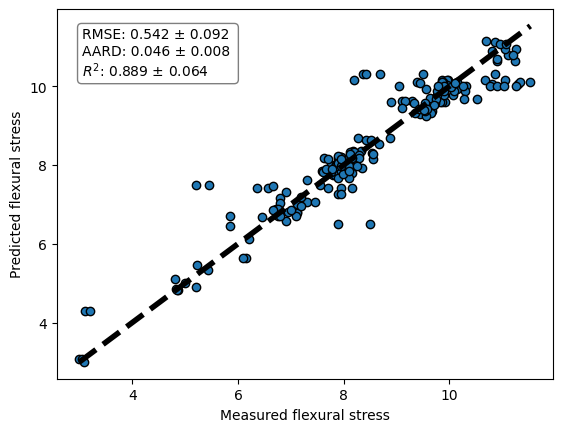

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import joblib


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()


model = MLPRegressor(random_state=42, max_iter=5000, **best_params_MLP_stress)
aard = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_mean_absolute_percentage_error', cv=5)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_stress_train, scoring='r2', cv=5)
rmse = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_root_mean_squared_error', cv=5)
rmse = -rmse

print('The model trained with the hyperparameters:', best_params_MLP_stress)
print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_stress_train, cv=5)

metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_stress_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_stress_train.min(), data_output_stress_train.max()], [data_output_stress_train.min(), data_output_stress_train.max()], "k--", lw=4)
ax.set_xlabel("Measured flexural stress")
ax.set_ylabel("Predicted flexural stress")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()

joblib.dump(model, 'MLP_model_stress.pkl')

weights = model.coefs_
print(weights)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()


#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter search space:
param_dist = {
    'hidden_layer_sizes': [(8, 5, 3), (10, 6, 4), (12, 8, 5), (10, 8, 5, 3), (12, 10, 6, 4), (14, 12, 8, 5)],  # Example values for hidden layer sizes
    'activation': ['relu', 'tanh', 'logistic'],
    'solver':['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.0001, 0.1),  # Example range for regularization strength
    'learning_rate_init': uniform(0.001, 0.01),  # Example range for initial learning rate
}

# Define the multi-layer perceptron regressor model:
model = MLPRegressor(random_state=42, max_iter=5000)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=10)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_stress_train)

# Get the best hyperparameters
best_params_MLP_stress = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_MLP_stress)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'activation': 'tanh', 'alpha': 0.031800156230578816, 'hidden_layer_sizes': (10, 6, 4), 'learning_rate_init': 0.009829173394313731, 'solver': 'lbfgs'}


,params,mean_test_score
0,"{'activation': 'tanh', 'alpha': 0.029976115188...",-4.462403
1,"{'activation': 'tanh', 'alpha': 0.058432173693...",-4.554670
2,"{'activation': 'tanh', 'alpha': 0.017011083656...",-3.607272
3,"{'activation': 'relu', 'alpha': 0.000494826632...",-3.167831
4,"{'activation': 'tanh', 'alpha': 0.072275531743...",-3.169195
...,...,...
95,"{'activation': 'tanh', 'alpha': 0.069473736426...",-4.453302
96,"{'activation': 'tanh', 'alpha': 0.025489747082...",-3.180986
97,"{'activation': 'relu', 'alpha': 0.065267847822...",-4.163325
98,"{'activation': 'tanh', 'alpha': 0.056012530396...",-0.520549


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()


#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter search space:
param_dist = {
    'hidden_layer_sizes': [(8, 5, 3), (10, 6, 4), (12, 8, 5), (10, 8, 5, 3), (12, 10, 6, 4), (14, 12, 8, 5)],  # Example values for hidden layer sizes
    'activation': ['relu', 'tanh', 'logistic'],
    'solver':['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.0001, 0.1),  # Example range for regularization strength
    'learning_rate_init': uniform(0.001, 0.01),  # Example range for initial learning rate
}

# Define the multi-layer perceptron regressor model:
model = MLPRegressor(random_state=42, max_iter=5000)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=20)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_stress_train)

# Get the best hyperparameters
best_params_MLP_stress = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_MLP_stress)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'activation': 'tanh', 'alpha': 0.032083650001966196, 'hidden_layer_sizes': (10, 6, 4), 'learning_rate_init': 0.01084033816765513, 'solver': 'lbfgs'}


,params,mean_test_score
0,"{'activation': 'logistic', 'alpha': 0.08987137...",-4.684054
1,"{'activation': 'logistic', 'alpha': 0.06927575...",-3.168047
2,"{'activation': 'logistic', 'alpha': 0.08425741...",-3.167849
3,"{'activation': 'logistic', 'alpha': 0.07840036...",-3.169402
4,"{'activation': 'logistic', 'alpha': 0.01176937...",-3.170551
...,...,...
95,"{'activation': 'tanh', 'alpha': 0.009676601067...",-3.180841
96,"{'activation': 'tanh', 'alpha': 0.097244103574...",-0.391796
97,"{'activation': 'logistic', 'alpha': 0.00461340...",-3.456908
98,"{'activation': 'tanh', 'alpha': 0.074837966125...",-3.191075


The model trained with the hyperparameters: {'activation': 'tanh', 'alpha': 0.06160072266991698, 'hidden_layer_sizes': (14, 12, 8, 5), 'learning_rate_init': 0.004586467812961639, 'solver': 'lbfgs'}
RMSE:
Mean: 0.5423877420045088
Standard deviation: 0.09231279750428306
AARD:
Mean: 0.04560654253200656
Standard deviation: 0.008106618169219372
R^2:
Mean: 0.888998606393079
Standard deviation: 0.0638275986619513


['MLP_model_stress.pkl']

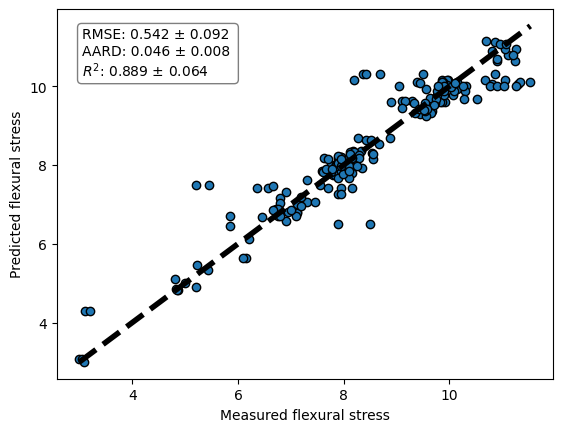

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import joblib


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()


model = MLPRegressor(random_state=42, max_iter=5000, **best_params_MLP_stress)
aard = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_mean_absolute_percentage_error', cv=5)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_stress_train, scoring='r2', cv=5)
rmse = cross_val_score(model, data_input_train, data_output_stress_train, scoring='neg_root_mean_squared_error', cv=5)
rmse = -rmse

print('The model trained with the hyperparameters:', best_params_MLP_stress)
print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_stress_train, cv=5)

metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_stress_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_stress_train.min(), data_output_stress_train.max()], [data_output_stress_train.min(), data_output_stress_train.max()], "k--", lw=4)
ax.set_xlabel("Measured flexural stress")
ax.set_ylabel("Predicted flexural stress")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()

joblib.dump(model, 'MLP_model_stress.pkl')


#### Water absorption

##### Random forest regressor

First, the number of trees in the random forest (n_estimators), the number of decisions in one tree (max_depth) and the minimal number of instances, which can still separated by a decsision (min_sample_split) are optimized by random search among these parameters.

The max_depth has the greatest effect on overfitting, so the effect of this on the model will be further evaluated manually.

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()

#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter search space:
param_dist = {
    'n_estimators': [25, 50, 100, 150, 200, 250],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [2, 3, 4, 5],
}

# Define the random forest regressor model:
model = RandomForestRegressor(random_state=42)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=10, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_water_train)

# Get the best hyperparameters
best_params_RF_water = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_RF_water)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'n_estimators': 50, 'min_samples_leaf': 2, 'max_depth': 20}


,params,mean_test_score
0,"{'n_estimators': 100, 'min_samples_leaf': 3, '...",-0.158658
1,"{'n_estimators': 250, 'min_samples_leaf': 2, '...",-0.134091
2,"{'n_estimators': 50, 'min_samples_leaf': 2, 'm...",-0.130515
3,"{'n_estimators': 200, 'min_samples_leaf': 5, '...",-0.349682
4,"{'n_estimators': 150, 'min_samples_leaf': 3, '...",-0.160519
5,"{'n_estimators': 50, 'min_samples_leaf': 3, 'm...",-0.156767
6,"{'n_estimators': 150, 'min_samples_leaf': 5, '...",-0.351349
7,"{'n_estimators': 25, 'min_samples_leaf': 5, 'm...",-0.334982
8,"{'n_estimators': 25, 'min_samples_leaf': 2, 'm...",-0.266503
9,"{'n_estimators': 200, 'min_samples_leaf': 3, '...",-0.272256


The model trained with the hyperparameters: {'n_estimators': 50, 'min_samples_leaf': 2, 'max_depth': 20}
RMSE:
Mean: 0.34627678999917066
Standard deviation: 0.10299155332903867
AARD:
Mean: 0.07910118282251302
Standard deviation: 0.023495570885500562
R^2:
Mean: 0.8509028248985635
Standard deviation: 0.1102169294683658


['random_forest_model_water.pkl']

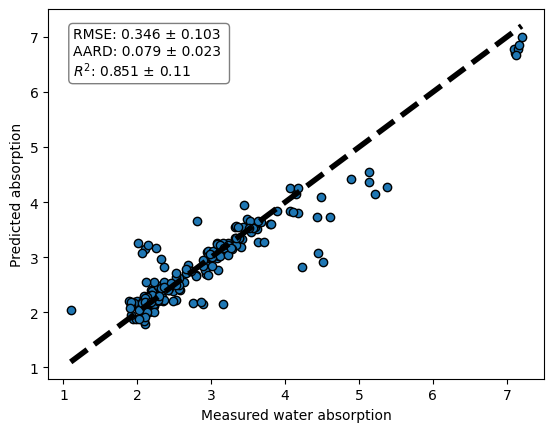

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
import joblib

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()

model = RandomForestRegressor(random_state=42, **best_params_RF_water)
aard = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_mean_absolute_percentage_error', cv=10)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_water_train, scoring='r2', cv=10)
rmse = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = -rmse

print('The model trained with the hyperparameters:', best_params_RF_water)
print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_water_train, cv=10)

metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"


fig, ax = plt.subplots()
ax.scatter(data_output_water_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_water_train.min(), data_output_water_train.max()], [data_output_water_train.min(), data_output_water_train.max()], "k--", lw=4)
ax.set_xlabel("Measured water absorption")
ax.set_ylabel("Predicted absorption")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()

#Save the model:
joblib.dump(model, 'random_forest_model_water.pkl')

##### Multilayer perceptron

In the MLP regressor, the layout of the neural network, applied search algorithm, activation function and learning rate are optimized in a random search.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()


#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

## Define the hyperparameter search space:
param_dist = {
    'hidden_layer_sizes': [(8, 5, 3), (10, 6, 4), (12, 8, 5), (10, 8, 5, 3), (12, 10, 6, 4), (14, 12, 8, 5)],  # Example values for hidden layer sizes
    'activation': ['relu', 'tanh', 'logistic'],
    'solver':['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.0001, 0.1),  # Example range for regularization strength
    'learning_rate_init': uniform(0.001, 0.01),  # Example range for initial learning rate
}

# Define the multi-layer perceptron regressor model:
model = MLPRegressor(random_state=42, max_iter=5000)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_water_train)

# Get the best hyperparameters
best_params_MLP_water = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_MLP_water)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'activation': 'tanh', 'alpha': 0.06160072266991698, 'hidden_layer_sizes': (14, 12, 8, 5), 'learning_rate_init': 0.004586467812961639, 'solver': 'lbfgs'}


,params,mean_test_score
0,"{'activation': 'logistic', 'alpha': 0.07975429...",-1.464271
1,"{'activation': 'logistic', 'alpha': 0.04468327...",-1.339727
2,"{'activation': 'logistic', 'alpha': 0.00215844...",-1.120436
3,"{'activation': 'tanh', 'alpha': 0.000177876584...",-1.125294
4,"{'activation': 'tanh', 'alpha': 0.000806630521...",-0.924718
...,...,...
95,"{'activation': 'relu', 'alpha': 0.073264775529...",-1.121982
96,"{'activation': 'logistic', 'alpha': 0.09317573...",-1.121982
97,"{'activation': 'relu', 'alpha': 0.074090876044...",-1.123902
98,"{'activation': 'relu', 'alpha': 0.050625237244...",-1.121982


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()


#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

## Define the hyperparameter search space:
param_dist = {
    'hidden_layer_sizes': [(8, 5, 3), (10, 6, 4), (12, 8, 5), (10, 8, 5, 3), (12, 10, 6, 4), (14, 12, 8, 5)],  # Example values for hidden layer sizes
    #'activation': ['relu', 'tanh', 'logistic'],
    'solver':['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.0001, 0.1),  # Example range for regularization strength
    'learning_rate_init': uniform(0.001, 0.01),  # Example range for initial learning rate
}

# Define the multi-layer perceptron regressor model:
model = MLPRegressor(random_state=42, max_iter=5000)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=10)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_water_train)

# Get the best hyperparameters
best_params_MLP_water = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_MLP_water)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'activation': 'tanh', 'alpha': 0.09631968876393154, 'hidden_layer_sizes': (12, 8, 5), 'learning_rate_init': 0.0028403482209315126, 'solver': 'lbfgs'}


,params,mean_test_score
0,"{'activation': 'tanh', 'alpha': 0.029976115188...",-1.218584
1,"{'activation': 'tanh', 'alpha': 0.058432173693...",-1.182815
2,"{'activation': 'tanh', 'alpha': 0.017011083656...",-1.196720
3,"{'activation': 'relu', 'alpha': 0.000494826632...",-1.121982
4,"{'activation': 'tanh', 'alpha': 0.072275531743...",-1.146293
...,...,...
95,"{'activation': 'tanh', 'alpha': 0.069473736426...",-1.210900
96,"{'activation': 'tanh', 'alpha': 0.025489747082...",-0.242278
97,"{'activation': 'relu', 'alpha': 0.065267847822...",-1.223251
98,"{'activation': 'tanh', 'alpha': 0.056012530396...",-0.204265


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()


#Import packages for the random search of the hyperparameters:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

## Define the hyperparameter search space:
param_dist = {
    'hidden_layer_sizes': [(8, 5, 3), (10, 6, 4), (12, 8, 5), (10, 8, 5, 3), (12, 10, 6, 4), (14, 12, 8, 5)],  # Example values for hidden layer sizes
    'activation': ['relu', 'tanh', 'logistic'],
    'solver':['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.0001, 0.1),  # Example range for regularization strength
    'learning_rate_init': uniform(0.001, 0.01),  # Example range for initial learning rate
}

# Define the multi-layer perceptron regressor model:
model = MLPRegressor(random_state=42, max_iter=5000)

# Define the random search:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=20)

# Fit the RandomizedSearchCV on the training data
random_search.fit(data_input_train, data_output_water_train)

# Get the best hyperparameters
best_params_MLP_water = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_MLP_water)

results_df = pd.DataFrame(random_search.cv_results_)
results_df[['params','mean_test_score']]

Best Hyperparameters:
{'activation': 'tanh', 'alpha': 0.06497204821640175, 'hidden_layer_sizes': (12, 10, 6, 4), 'learning_rate_init': 0.01029568297150502, 'solver': 'lbfgs'}


,params,mean_test_score
0,"{'activation': 'logistic', 'alpha': 0.08987137...",-1.515988
1,"{'activation': 'logistic', 'alpha': 0.06927575...",-1.121372
2,"{'activation': 'logistic', 'alpha': 0.08425741...",-1.121986
3,"{'activation': 'logistic', 'alpha': 0.07840036...",-1.121222
4,"{'activation': 'logistic', 'alpha': 0.01176937...",-1.122001
...,...,...
95,"{'activation': 'tanh', 'alpha': 0.009676601067...",-1.121982
96,"{'activation': 'tanh', 'alpha': 0.097244103574...",-0.144304
97,"{'activation': 'logistic', 'alpha': 0.00461340...",-1.454919
98,"{'activation': 'tanh', 'alpha': 0.074837966125...",-0.476345


In [ ]:
weights = mlp.coefs_

The model trained with the hyperparameters: {'activation': 'tanh', 'alpha': 0.06160072266991698, 'hidden_layer_sizes': (14, 12, 8, 5), 'learning_rate_init': 0.004586467812961639, 'solver': 'lbfgs'}
RMSE:
Mean: 0.3174428085208452
Standard deviation: 0.11703862318258443
AARD:
Mean: 0.07513962695281821
Standard deviation: 0.018508169046019447
R^2:
Mean: 0.8714891704666954
Standard deviation: 0.0956162153992055


['MLP_model_water.pkl']

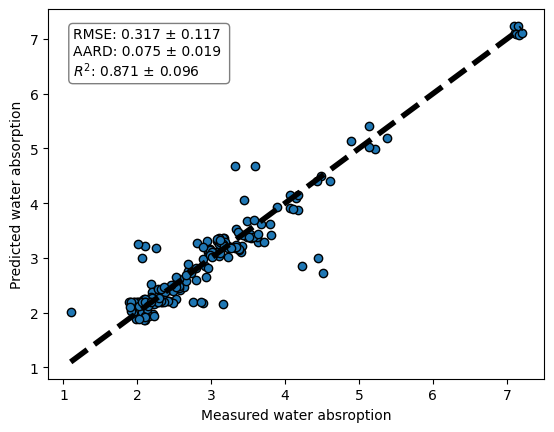

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import joblib

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()


model = MLPRegressor(random_state=42, max_iter=5000, **best_params_MLP_water)
aard = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_mean_absolute_percentage_error', cv=10)
aard = -aard
r2 = cross_val_score(model, data_input_train, data_output_water_train, scoring='r2', cv=10)
rmse = cross_val_score(model, data_input_train, data_output_water_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = -rmse

print('The model trained with the hyperparameters:', best_params_MLP_water)
print('RMSE:')
print('Mean:', rmse.mean())
print('Standard deviation:', rmse.std())
print('AARD:')
print('Mean:', aard.mean())
print('Standard deviation:', aard.std())
print('R^2:')
print('Mean:', r2.mean())
print('Standard deviation:', r2.std())

predicted = cross_val_predict(model, data_input_train, data_output_water_train, cv=10)
metrics = f"RMSE: {rmse.mean().round(3)} \u00B1 {rmse.std().round(3)} \nAARD: {aard.mean().round(3)} \u00B1 {aard.std().round(3)} \n$R^2$: {r2.mean().round(3)} \u00B1 {r2.std().round(3)}"

fig, ax = plt.subplots()
ax.scatter(data_output_water_train, predicted, edgecolors=(0, 0, 0))
ax.plot([data_output_water_train.min(), data_output_water_train.max()], [data_output_water_train.min(), data_output_water_train.max()], "k--", lw=4)
ax.set_xlabel("Measured water absroption")
ax.set_ylabel("Predicted water absorption")
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5)
ax.text(0.05, 0.95, metrics, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=bbox_props)
#plt.show()
plt.draw()
joblib.dump(model, 'MLP_model_water.pkl')

### Model testing

#### Flexural stress

##### Random forest regressor
Below, the random forest regressor model is ran with optimized hyperparameters on the train, test and complete dataset and the results are plotted.

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

# Load the model
model = joblib.load('random_forest_model_stress.pkl')

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()

data_input_test = pd.read_csv("data_input_test.csv")
data_output_stress_test = pd.read_csv('data_output_stress_test.csv').values.ravel()

#Fit the model on the train and test dataset:
model.fit(data_input_train, data_output_stress_train)
data_pred_stress_train = model.predict(data_input_train)
data_pred_stress_test = model.predict(data_input_test)

joblib.dump(model, 'random_forest_model_stress_trained.joblib')

['random_forest_model_stress_trained.joblib']

In [ ]:
print(f"Train set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_stress_train, data_pred_stress_train))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_stress_train - data_pred_stress_train) / data_output_stress_train))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_stress_train, data_pred_stress_train)
print(f"R-squared (R2): {r2}")

Train set:
Root Mean Squared Error (RMSE): 0.41336091576935774
Average Absolute Relative Difference (AARD): 0.0315066447252096
R-squared (R2): 0.9447436858766283


In [ ]:
print(f"Test set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_stress_test, data_pred_stress_test))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_stress_test - data_pred_stress_test) / data_output_stress_test))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_stress_test, data_pred_stress_test)
print(f"R-squared (R2): {r2}")

Test set:
Root Mean Squared Error (RMSE): 0.4976691950700131
Average Absolute Relative Difference (AARD): 0.04811679407700223
R-squared (R2): 0.9395589176677457


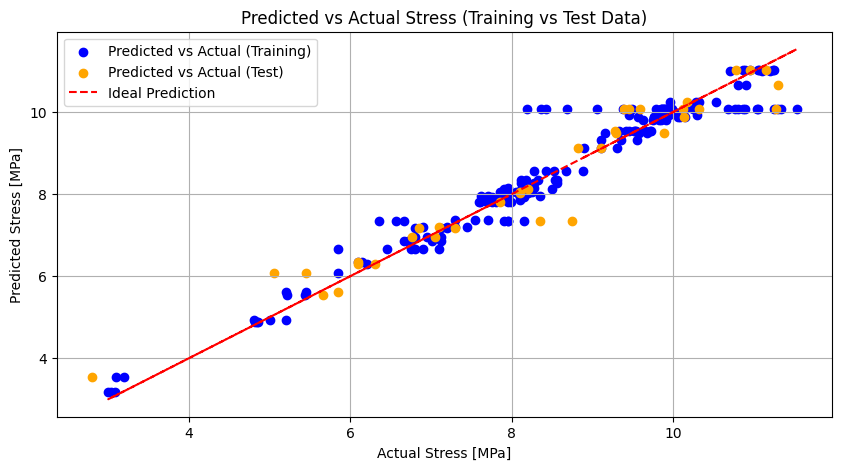

In [ ]:
import matplotlib.pyplot as plt

# Plot for training data
plt.figure(figsize=(10, 5))
plt.scatter(data_output_stress_train, data_pred_stress_train, color='blue', label='Predicted vs Actual (Training)')
plt.scatter(data_output_stress_test, data_pred_stress_test, color='orange', label='Predicted vs Actual (Test)')
plt.plot(data_output_stress_train, data_output_stress_train, color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Stress [MPa]')
plt.ylabel('Predicted Stress [MPa]')
plt.title('Predicted vs Actual Stress (Training vs Test Data)')
plt.legend()
plt.grid(True)
plt.show()

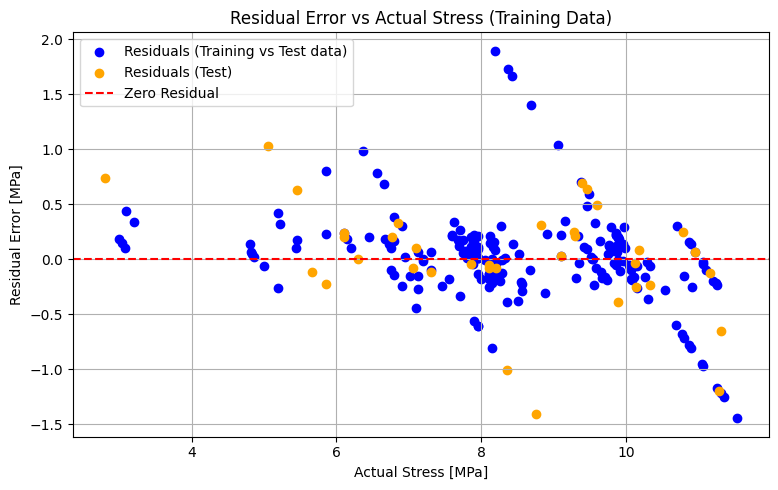

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals for training data
residuals_train = data_pred_stress_train - data_output_stress_train

# Calculate residuals for test data
residuals_test = data_pred_stress_test - data_output_stress_test

# Create a new figure
plt.figure(figsize=(15, 5))

# Plot residuals for training data
plt.subplot(1, 2, 1)
plt.scatter(data_output_stress_train, residuals_train, color='blue', label='Residuals (Training vs Test data)')
plt.scatter(data_output_stress_test, residuals_test, color='orange', label='Residuals (Test)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Stress [MPa]')
plt.ylabel('Residual Error [MPa]')
plt.title('Residual Error vs Actual Stress (Training Data)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

##### Multi-layer perceptron regressor

Below, the multi-layer perceptron regressor model is ran with optimized hyperparameters on the train, test and complete dataset and the results are plotted.

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

# Load the model
model = joblib.load('MLP_model_stress.pkl')

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()

data_input_test = pd.read_csv("data_input_test.csv")
data_output_stress_test = pd.read_csv('data_output_stress_test.csv').values.ravel()

#Fit the model on the train and test dataset:
model.fit(data_input_train, data_output_stress_train)
data_pred_stress_train = model.predict(data_input_train)
data_pred_stress_test = model.predict(data_input_test)

joblib.dump(model, 'MLP_model_stress_trained.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


['MLP_model_stress_trained.joblib']

In [ ]:
print(f"Train set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_stress_train, data_pred_stress_train))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_stress_train - data_pred_stress_train) / data_output_stress_train))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_stress_train, data_pred_stress_train)
print(f"R-squared (R2): {r2}")

Train set:
Root Mean Squared Error (RMSE): 0.4167135887505373
Average Absolute Relative Difference (AARD): 0.03033984628912441
R-squared (R2): 0.9438437089818099


In [ ]:
print(f"Test set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_stress_test, data_pred_stress_test))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_stress_test - data_pred_stress_test) / data_output_stress_test))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_stress_test, data_pred_stress_test)
print(f"R-squared (R2): {r2}")

Test set:
Root Mean Squared Error (RMSE): 0.4787943279392036
Average Absolute Relative Difference (AARD): 0.04412234448558594
R-squared (R2): 0.9440566192937302


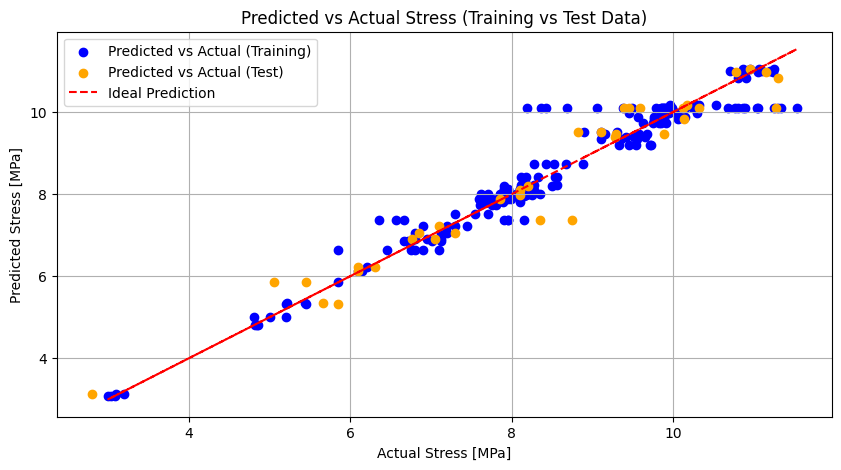

In [ ]:
import matplotlib.pyplot as plt

# Plot for training data
plt.figure(figsize=(10, 5))
plt.scatter(data_output_stress_train, data_pred_stress_train, color='blue', label='Predicted vs Actual (Training)')
plt.scatter(data_output_stress_test, data_pred_stress_test, color='orange', label='Predicted vs Actual (Test)')
plt.plot(data_output_stress_train, data_output_stress_train, color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Stress [MPa]')
plt.ylabel('Predicted Stress [MPa]')
plt.title('Predicted vs Actual Stress (Training vs Test Data)')
plt.legend()
plt.grid(True)
plt.show()

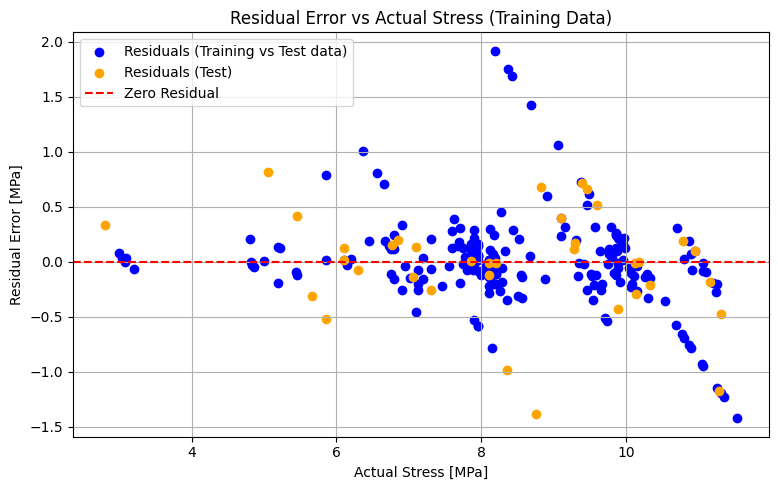

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals for training data
residuals_train = data_pred_stress_train - data_output_stress_train

# Calculate residuals for test data
residuals_test = data_pred_stress_test - data_output_stress_test

# Create a new figure
plt.figure(figsize=(15, 5))

# Plot residuals for training data
plt.subplot(1, 2, 1)
plt.scatter(data_output_stress_train, residuals_train, color='blue', label='Residuals (Training vs Test data)')
plt.scatter(data_output_stress_test, residuals_test, color='orange', label='Residuals (Test)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Stress [MPa]')
plt.ylabel('Residual Error [MPa]')
plt.title('Residual Error vs Actual Stress (Training Data)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Water absorption

##### Random forest regressor
Below, the random forest regressor model is ran with optimized hyperparameters on the train, test and complete dataset and the results are plotted.

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

# Load the model
model = joblib.load('random_forest_model_water.pkl')

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()

data_input_test = pd.read_csv("data_input_test.csv")
data_output_water_test = pd.read_csv('data_output_water_test.csv').values.ravel()

#Fit the model on the train and test dataset:
model.fit(data_input_train, data_output_water_train)
data_pred_water_train = model.predict(data_input_train)
data_pred_water_test = model.predict(data_input_test)

joblib.dump(model, 'random_forest_model_water_trained.joblib')

['random_forest_model_water_trained.joblib']

In [ ]:
print(f"Train set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_water_train, data_pred_water_train))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_water_train - data_pred_water_train) / data_output_water_train))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_water_train, data_pred_water_train)
print(f"R-squared (R2): {r2}")

Train set:
Root Mean Squared Error (RMSE): 0.2736009373103003
Average Absolute Relative Difference (AARD): 0.057068169927970834
R-squared (R2): 0.9331264469944711


In [ ]:
print(f"Test set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_water_test, data_pred_water_test))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_water_test - data_pred_water_test) / data_output_water_test))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_water_test, data_pred_water_test)
print(f"R-squared (R2): {r2}")

Test set:
Root Mean Squared Error (RMSE): 0.29715276824801856
Average Absolute Relative Difference (AARD): 0.07673856323168708
R-squared (R2): 0.8207962581696653


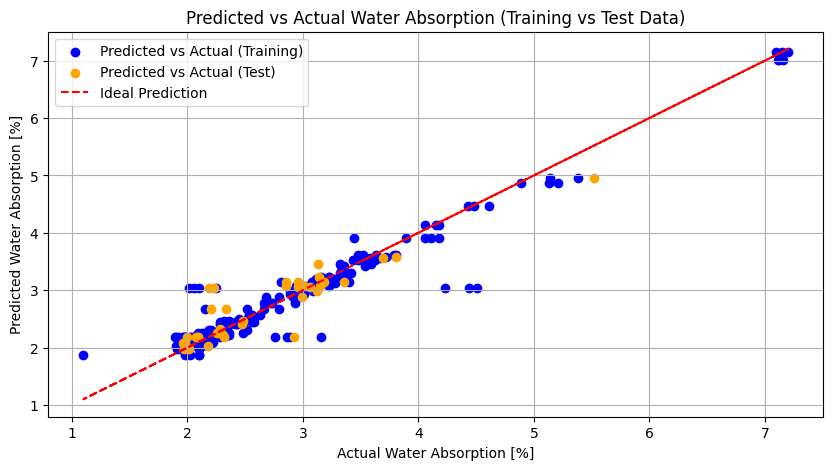

In [ ]:
import matplotlib.pyplot as plt

# Plot for training data
plt.figure(figsize=(10, 5))
plt.scatter(data_output_water_train, data_pred_water_train, color='blue', label='Predicted vs Actual (Training)')
plt.scatter(data_output_water_test, data_pred_water_test, color='orange', label='Predicted vs Actual (Test)')
plt.plot(data_output_water_train, data_output_water_train, color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Water Absorption [%]')
plt.ylabel('Predicted Water Absorption [%]')
plt.title('Predicted vs Actual Water Absorption (Training vs Test Data)')
plt.legend()
plt.grid(True)
plt.show()

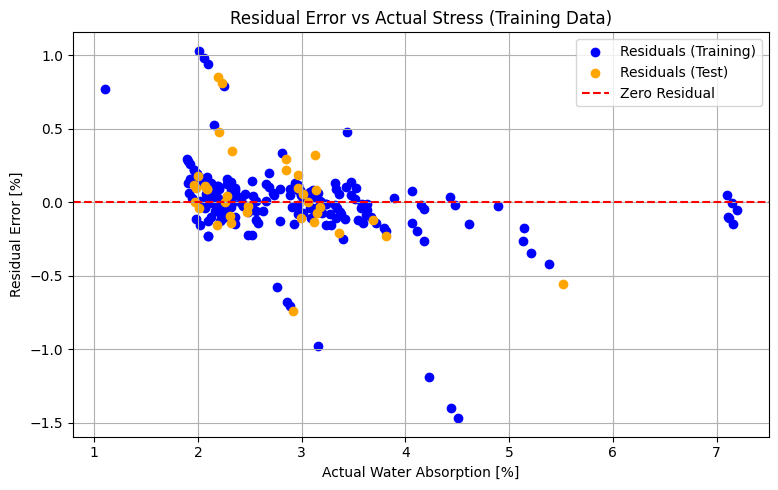

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals for training data
residuals_train = data_pred_water_train - data_output_water_train

# Calculate residuals for test data
residuals_test = data_pred_water_test - data_output_water_test

# Create a new figure
plt.figure(figsize=(15, 5))

# Plot residuals for training data
plt.subplot(1, 2, 1)
plt.scatter(data_output_water_train, residuals_train, color='blue', label='Residuals (Training)')
plt.scatter(data_output_water_test, residuals_test, color='orange', label='Residuals (Test)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Water Absorption [%]')
plt.ylabel('Residual Error [%]')
plt.title('Residual Error vs Actual Stress (Training Data)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

##### Multi-layer perceptron regressor

Below, the multi-layer perceptron regressor model is ran with optimized hyperparameters on the train, test and complete dataset and the results are plotted.

In [ ]:
#Import packages for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

# Load the model
model = joblib.load('MLP_model_water.pkl')

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()

data_input_test = pd.read_csv("data_input_test.csv")
data_output_water_test = pd.read_csv('data_output_water_test.csv').values.ravel()

#Fit the model on the train and test dataset:
model.fit(data_input_train, data_output_water_train)
data_pred_water_train = model.predict(data_input_train)
data_pred_water_test = model.predict(data_input_test)

joblib.dump(model, 'MLP_model_water_trained.joblib')

['MLP_model_water_trained.joblib']

In [ ]:
print(f"Train set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_water_train, data_pred_water_train))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_water_train - data_pred_water_train) / data_output_water_train))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_water_train, data_pred_water_train)
print(f"R-squared (R2): {r2}")

Train set:
Root Mean Squared Error (RMSE): 0.27318850864331645
Average Absolute Relative Difference (AARD): 0.05945052809994178
R-squared (R2): 0.933327906704265


In [ ]:
print(f"Test set:")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_output_water_test, data_pred_water_test))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate AARD
aard = np.mean(np.abs((data_output_water_test - data_pred_water_test) / data_output_water_test))
print(f"Average Absolute Relative Difference (AARD): {aard}")

# Calculate R2
r2 = r2_score(data_output_water_test, data_pred_water_test)
print(f"R-squared (R2): {r2}")

Test set:
Root Mean Squared Error (RMSE): 0.27720436277372074
Average Absolute Relative Difference (AARD): 0.06999160534102081
R-squared (R2): 0.8440491899441501


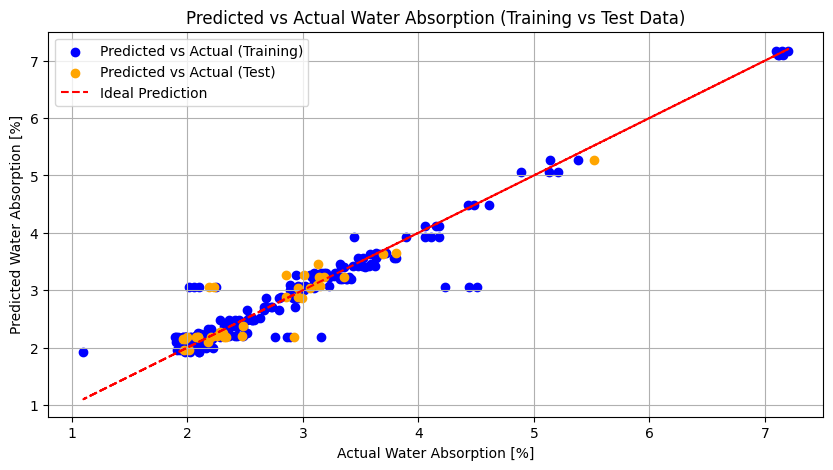

In [ ]:
import matplotlib.pyplot as plt

# Plot for training data
plt.figure(figsize=(10, 5))
plt.scatter(data_output_water_train, data_pred_water_train, color='blue', label='Predicted vs Actual (Training)')
plt.scatter(data_output_water_test, data_pred_water_test, color='orange', label='Predicted vs Actual (Test)')
plt.plot(data_output_water_train, data_output_water_train, color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Water Absorption [%]')
plt.ylabel('Predicted Water Absorption [%]')
plt.title('Predicted vs Actual Water Absorption (Training vs Test Data)')
plt.legend()
plt.grid(True)
plt.show()

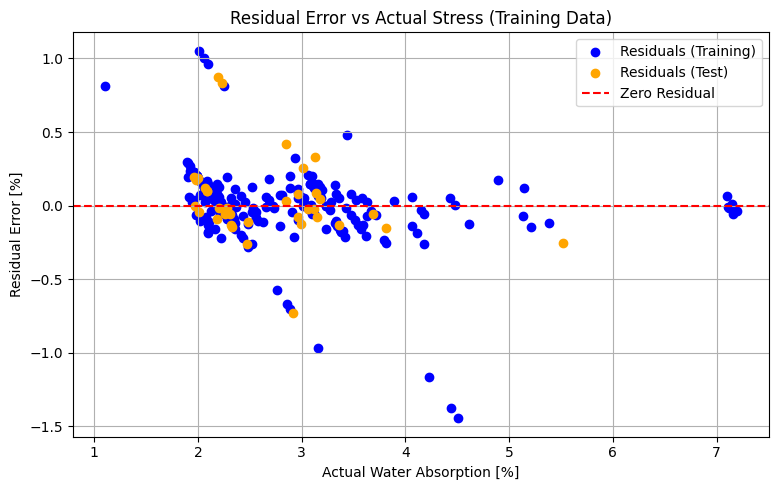

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals for training data
residuals_train = data_pred_water_train - data_output_water_train

# Calculate residuals for test data
residuals_test = data_pred_water_test - data_output_water_test

# Create a new figure
plt.figure(figsize=(15, 5))

# Plot residuals for training data
plt.subplot(1, 2, 1)
plt.scatter(data_output_water_train, residuals_train, color='blue', label='Residuals (Training)')
plt.scatter(data_output_water_test, residuals_test, color='orange', label='Residuals (Test)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Water Absorption [%]')
plt.ylabel('Residual Error [%]')
plt.title('Residual Error vs Actual Stress (Training Data)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Model summary

Results on the training dataset:

|Property          | Model       | Random Forest | Multi-layer perceptron |
|-----------       | ----------- | -----------   | -----------            |
|Flexural stress   | RMSE        | 0.4453         | 0.4511                |
|                  | AARD        | 0.0440         | 0.0429                |
|                  | R^2         | 0.9516         | 0.9504                |
|Water absorption  | RMSE        | 0.2837         | 0.2803                |
|                  | AARD        | 0.0703         | 0.0714                |
|                  | R^2         | 0.8367         | 0.8406                |

### Conclusions

## Property screening

In the next step, the input variables are screened in the investigated range to find the optimal values for maximum output values of the flexural stress and minimal output values of water absorption.
10 equidistant point of the input varaibles within the investigated range are selected.
5 of the most significant properties in the models are selected, resulting a 100000 screening points
The input variables used are:


The input variables used in the model equidistantly:
- **Sand**: 50-58%
- **Oil-to-mixture**: 5-10 %
- **Catalyst-to-Mixture**: 0-18 %
- **Curing time**: 0.15-15 hours
- **Blending time**: 5-320 minutes

The additional properties, which were not considered for the predicitve model, are left out from the predictions.
From the production aspect, they were considered to have the mean values of the dataset (e.g., temperature: 195 °C)

- **Temperature**: 195 °C
- **Compaction blows**: 10
- **Storage time**: 0.2 days

 This screening generates 100.000 datapoints.
 The machine learning models are used to predict the flexural stress and water adsorption in these points.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

data = pd.read_excel("vegetile_data.xlsx")
data_nozero = data[data["Flexural Stress"] != 0]

#Generate the 5 properties with 10 equidistant values between the minimum and maximum:
Sand = np.linspace(data_nozero['Sand'].min(), data_nozero['Sand'].max(), 10)
Oil_to_Mixture = np.linspace(data_nozero['Oil-to-Mixture'].min(), data_nozero['Oil-to-Mixture'].max(), 10)
Catalyst_to_Mixture = np.linspace(data_nozero['Catalyst-to-Mixture'].min(), data_nozero['Catalyst-to-Mixture'].max(), 10)
Curing_time = np.linspace(data_nozero['Curing time'].min(), data_nozero['Curing time'].max(), 10)
Blending_time = np.linspace(data_nozero['Blending time'].min(), data_nozero['Blending time'].max(), 10)

# Generate all combinations
all_combinations = list(product(Sand, Oil_to_Mixture, Catalyst_to_Mixture, Curing_time, Blending_time))

# Create a DataFrame from the combinations
columns = ['Sand', 'Oil-to-Mixture', 'Catalyst-to-Mixture', 'Curing time', 'Blending time']
optim_set = pd.DataFrame(all_combinations, columns=columns)

# Display the DataFrame
print(optim_set)

optim_set.to_csv("optim_set_scaled.csv", index=False)
optim_set.describe()

       Sand  Oil-to-Mixture  Catalyst-to-Mixture  Curing time  Blending time
0      50.0             5.0                  0.0         0.15            5.0
1      50.0             5.0                  0.0         0.15           40.0
2      50.0             5.0                  0.0         0.15           75.0
3      50.0             5.0                  0.0         0.15          110.0
4      50.0             5.0                  0.0         0.15          145.0
...     ...             ...                  ...          ...            ...
99995  85.0            10.0                 18.0        10.00          180.0
99996  85.0            10.0                 18.0        10.00          215.0
99997  85.0            10.0                 18.0        10.00          250.0
99998  85.0            10.0                 18.0        10.00          285.0
99999  85.0            10.0                 18.0        10.00          320.0

[100000 rows x 5 columns]


,Sand,Oil-to-Mixture,Catalyst-to-Mixture,Curing time,Blending time
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,67.500000,7.500000,9.000000,5.075000,162.500000
std,11.170039,1.595720,5.744591,3.143568,100.530349
min,50.000000,5.000000,0.000000,0.150000,5.000000
25%,57.777778,6.111111,4.000000,2.338889,75.000000
50%,67.500000,7.500000,9.000000,5.075000,162.500000
75%,77.222222,8.888889,14.000000,7.811111,250.000000
max,85.000000,10.000000,18.000000,10.000000,320.000000


In [ ]:
#Scale the optimization set:
#Import and setup scaler:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
optim_set_scaled = min_max_scaler.fit_transform(optim_set)
optim_set_scaled = pd.DataFrame(optim_set_scaled, columns=optim_set.columns)
#optim_set_scaled = optim_set_scaled.drop('index', axis=1)
optim_set_scaled.to_csv('optim_set_scaled.csv', index=False)
optim_set_scaled.describe()

,Sand,Oil-to-Mixture,Catalyst-to-Mixture,Curing time,Blending time
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000
std,0.319144,0.319144,0.319144,0.319144,0.319144
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.222222,0.222222,0.222222,0.222222
50%,0.500000,0.500000,0.500000,0.500000,0.500000
75%,0.777778,0.777778,0.777778,0.777778,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Predicting the flexural stress and water absoorption:
# Loading the models:
import joblib

# Load the trained model from the file
MLP_model_stress_trained =  joblib.load('MLP_model_stress_trained.joblib')
MLP_model_water_trained = joblib.load('MLP_model_water_trained.joblib')

# Make predictions:
stress_pred = MLP_model_stress_trained.predict(optim_set_scaled)
water_pred = MLP_model_water_trained.predict(optim_set_scaled)

# Add the predictions to a new column in the DataFrame:
optim_set_pred = optim_set
optim_set_pred['Flexural Stress'] = stress_pred
optim_set_pred['Water Absorption'] = water_pred

optim_set_pred.to_csv('optim_set_pred.csv', index=False)

# Display a sample of the updated DataFrame:
optim_set_pred.sample(10)

,Sand,Oil-to-Mixture,Catalyst-to-Mixture,Curing time,Blending time,Flexural Stress,Water Absorption
22052,57.777778,6.111111,0.0,5.622222,75.0,3.558892,4.192302
65904,73.333333,7.777778,18.0,0.150000,145.0,12.538367,1.888235
32759,61.666667,6.111111,14.0,5.622222,320.0,1.983221,5.938842
30802,61.666667,5.000000,16.0,0.150000,75.0,12.626891,2.699479
33947,61.666667,6.666667,18.0,4.527778,250.0,2.133489,4.859616
78178,77.222222,9.444444,2.0,7.811111,285.0,3.611600,5.265116
91276,85.000000,5.555556,4.0,7.811111,215.0,1.818927,4.288232
71421,77.222222,5.555556,8.0,2.338889,40.0,2.943281,3.105247
99335,85.000000,10.000000,6.0,3.433333,180.0,4.135251,1.351112
49919,65.555556,10.000000,18.0,1.244444,320.0,7.153799,2.856973


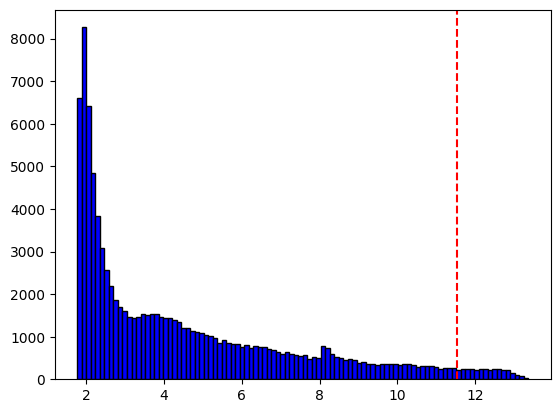

In [ ]:
plt.hist(optim_set_pred['Flexural Stress'], bins=100, color='blue', edgecolor='black')
plt.axvline(x=data_nozero['Flexural Stress'].max(), color='red', linestyle='--')
plt.savefig('synth_stress.png', dpi=300)
plt.show()

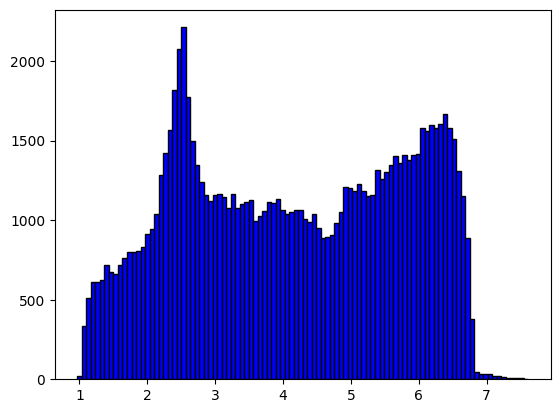

In [ ]:
plt.hist(optim_set_pred['Water Absorption'], bins=100, color='blue', edgecolor='black')
plt.savefig('synth_water.png', dpi=300)
plt.show()

In [ ]:
#Number of instances with stress value above the experimentally determined value:

threshold_value = data_nozero['Flexural Stress'].max()

instances_above_experimental = optim_set_pred[optim_set_pred['Flexural Stress'] > threshold_value]
instances_above_experimental.shape[0]

3096

In [ ]:
threshold_value

11.53

In [ ]:
optim_set_pred['Flexural Stress'].max()

13.367095720523459

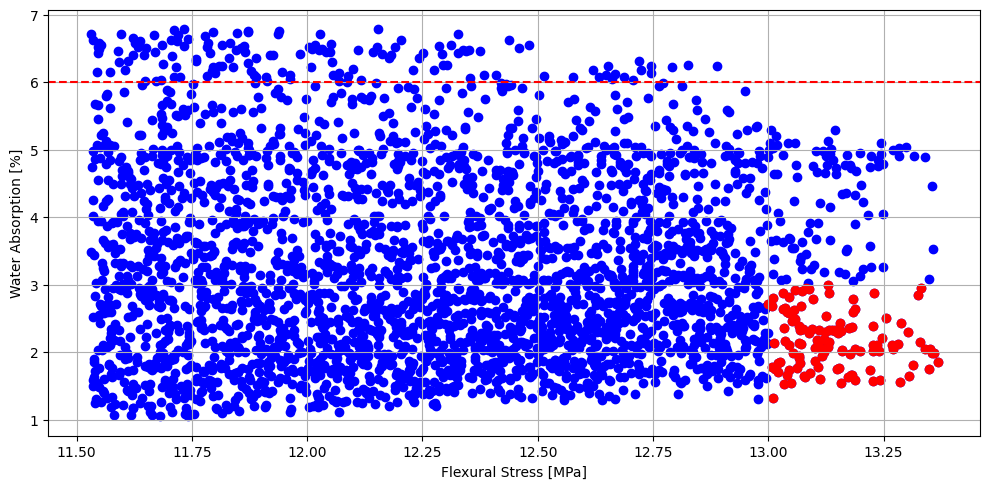

In [ ]:
plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
plt.scatter(instances_above_experimental['Flexural Stress'], instances_above_experimental['Water Absorption'], color='blue')
plt.scatter(best_tiles['Flexural Stress'], best_tiles['Water Absorption'], color='red')
plt.axhline(y=6, color='red', linestyle='--')
plt.xlabel('Flexural Stress [MPa]')
plt.ylabel('Water Absorption [%]')
#plt.title('Flexural Stress vs water Absorption in samples with flexural stress above experimental measurements')
plt.grid(True)
plt.tight_layout()
plt.savefig('synth_max_stress.png', dpi=300)
plt.show()

In [ ]:
optim_set_pred.columns

Index(['Sand', 'Oil-to-Mixture', 'Catalyst-to-Mixture', 'Curing time',
       'Blending time', 'Flexural Stress', 'Water Absorption'],
      dtype='object')

In [ ]:
best_tiles = optim_set_pred[(optim_set_pred['Flexural Stress'] > 13.00) & (optim_set_pred['Water Absorption'] < 3.00)]
best_tiles.count()

Sand                   119
Oil-to-Mixture         119
Catalyst-to-Mixture    119
Curing time            119
Blending time          119
Flexural Stress        119
Water Absorption       119
dtype: int64

In [ ]:
best_tiles.describe()

,Sand,Oil-to-Mixture,Catalyst-to-Mixture,Curing time,Blending time,Flexural Stress,Water Absorption
count,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000
mean,64.901961,6.844071,12.016807,1.500000e-01,106.176471,13.139998,2.170631
std,3.866391,0.609151,4.740706,1.114917e-16,48.392402,0.096944,0.403867
min,57.777778,5.555556,0.000000,1.500000e-01,5.000000,13.000043,1.326653
25%,61.666667,6.666667,10.000000,1.500000e-01,75.000000,13.065827,1.850739
50%,65.555556,6.666667,12.000000,1.500000e-01,110.000000,13.120816,2.116705
75%,69.444444,7.222222,16.000000,1.500000e-01,145.000000,13.188631,2.412908
max,73.333333,8.333333,18.000000,1.500000e-01,215.000000,13.367096,2.996883


## Life cycle analysis

### Life cycle data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_LCA = pd.read_csv('optim_set_pred.csv')

In [ ]:
data_LCA.columns

Index(['Sand', 'Oil-to-Mixture', 'Catalyst-to-Mixture', 'Curing time',
       'Blending time', 'Flexural Stress', 'Water Absorption'],
      dtype='object')

In [ ]:
#Make varaibles for the mass and energy flows from the input variable:
data_LCA['m_sand']= (data_LCA['Sand']/100)*2/(1+(data_LCA['Oil-to-Mixture']/100)+(data_LCA['Catalyst-to-Mixture']/100)*(data_LCA['Oil-to-Mixture']/100))
data_LCA['m_filler'] = (1-data_LCA['Sand']/100)*2/(1+(data_LCA['Oil-to-Mixture']/100)+(data_LCA['Catalyst-to-Mixture']/100)*(data_LCA['Oil-to-Mixture']/100))
data_LCA['m_oil'] =(data_LCA['Oil-to-Mixture']/100)*(data_LCA['m_sand']+data_LCA['m_filler'])
data_LCA['m_cat']=data_LCA['m_oil']*(data_LCA['Catalyst-to-Mixture']/100)

data_LCA['E_mixing'] = data_LCA['Blending time']*1.5/60
data_LCA['E_curing'] = data_LCA['Curing time']*(8/120)*24

In [ ]:
data_LCA

,Sand,Oil-to-Mixture,Catalyst-to-Mixture,Curing time,Blending time,Flexural Stress,Water Absorption,m_sand,m_filler,m_oil,m_cat,E_mixing,E_curing
0,50.0,5.0,0.0,0.15,5.0,6.597707,4.446577,0.952381,0.952381,0.095238,0.0000,0.125,0.24
1,50.0,5.0,0.0,0.15,40.0,6.606778,4.452066,0.952381,0.952381,0.095238,0.0000,1.000,0.24
2,50.0,5.0,0.0,0.15,75.0,6.920568,4.457358,0.952381,0.952381,0.095238,0.0000,1.875,0.24
3,50.0,5.0,0.0,0.15,110.0,7.960255,4.462464,0.952381,0.952381,0.095238,0.0000,2.750,0.24
4,50.0,5.0,0.0,0.15,145.0,11.219010,4.467393,0.952381,0.952381,0.095238,0.0000,3.625,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,85.0,10.0,18.0,10.00,180.0,3.289068,5.693711,1.520572,0.268336,0.178891,0.0322,4.500,16.00
99996,85.0,10.0,18.0,10.00,215.0,3.258855,5.705548,1.520572,0.268336,0.178891,0.0322,5.375,16.00
99997,85.0,10.0,18.0,10.00,250.0,2.928559,5.717204,1.520572,0.268336,0.178891,0.0322,6.250,16.00
99998,85.0,10.0,18.0,10.00,285.0,2.545036,5.728680,1.520572,0.268336,0.178891,0.0322,7.125,16.00


In [ ]:
#Import LCA data from excel:
LCA_source = pd.read_excel("LCA_data.xlsx")

In [ ]:
column_names = LCA_source.columns.tolist()
column_names_excluding_first_two = column_names[2:]
column_names_characteristic = ['Characteristic_' + element for element in column_names_excluding_first_two]
column_names_normalized = ['Normalized_' + element for element in column_names_excluding_first_two]
column_names_weighted = ['weighted_' + element for element in column_names_excluding_first_two]

for category in column_names_excluding_first_two:
    data_LCA['Characteristic_' + category] = data_LCA['m_sand']*LCA_source.loc[3, category] + data_LCA['m_oil']*LCA_source.loc[0, category] + data_LCA['m_cat']*LCA_source.loc[6, category]  + data_LCA['E_curing']*LCA_source.loc[9, category]

for category in column_names_excluding_first_two:
    data_LCA['Normalized_' + category] = data_LCA['m_sand']*LCA_source.loc[4, category] + data_LCA['m_oil']*LCA_source.loc[1, category] + data_LCA['m_cat']*LCA_source.loc[7, category]  + data_LCA['E_curing']*LCA_source.loc[10, category]

for category in column_names_excluding_first_two:
    data_LCA['weighted_' + category] = data_LCA['m_sand']*LCA_source.loc[5, category] + data_LCA['m_oil']*LCA_source.loc[2, category] + data_LCA['m_cat']*LCA_source.loc[8, category]  + data_LCA['E_curing']*LCA_source.loc[11, category]

data_LCA['Weighted_sum'] = data_LCA.loc[:, data_LCA.columns[data_LCA.columns.str.startswith('weighted')]].sum(axis=1)

In [ ]:
data_LCA.columns

Index(['Sand', 'Oil-to-Mixture', 'Catalyst-to-Mixture', 'Curing time',
       'Blending time', 'Flexural Stress', 'Water Absorption', 'm_sand',
       'm_filler', 'm_oil', 'm_cat', 'E_mixing', 'E_curing',
       'Characteristic_Acidification', 'Characteristic_Climate change',
       'Characteristic_Climate change-Biogenic',
       'Characteristic_Climate change-Fossil',
       'Characteristic_Climate change-Land use and land use change',
       'Characteristic_Ecotoxicity, freshwater',
       'Characteristic_Ecotoxicity, freshwater_inorganics',
       'Characteristic_Ecotoxicity, freshwater_organics',
       'Characteristic_EF-particulate Matter',
       'Characteristic_Eutrophication marine',
       'Characteristic_Eutrophication, freshwater',
       'Characteristic_Eutrophication, terrestrial',
       'Characteristic_Human toxicity, cancer',
       'Characteristic_Human toxicity, cancer_inorganics',
       'Characteristic_Human toxicity, cancer_organics',
       'Characteristic_Human

In [ ]:
data_LCA_opt = data_LCA[['Flexural Stress', 'Water Absorption','Characteristic_Climate change','Weighted_sum']]

data_LCA_opt.to_csv('data_LCA_opt.csv', index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

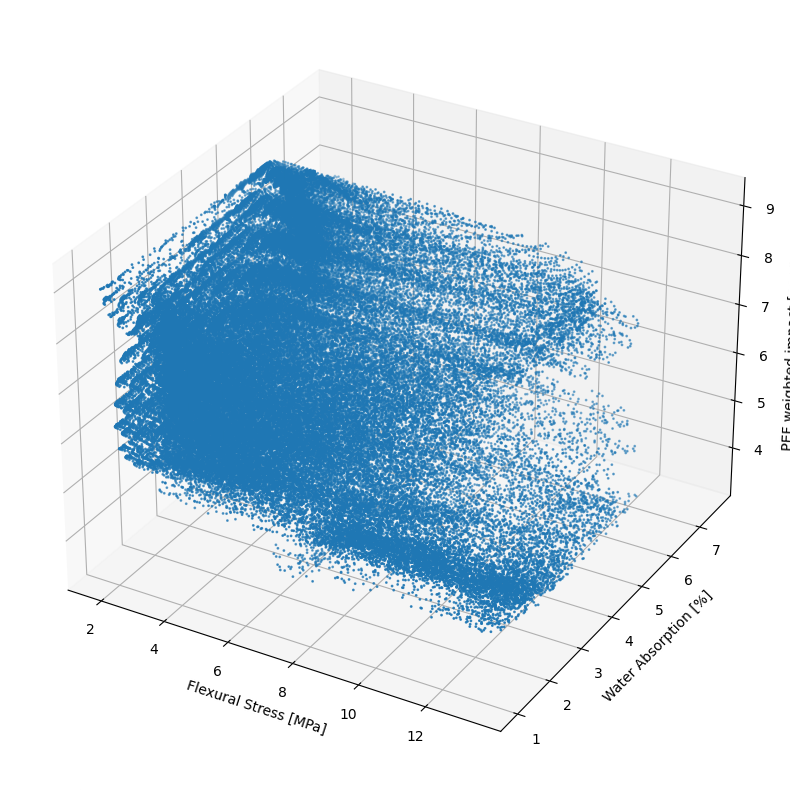

In [ ]:
from matplotlib.ticker import ScalarFormatter
# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data_LCA_opt['Flexural Stress'], data_LCA['Water Absorption'], data_LCA['Weighted_sum'], s=1)



# Set labels
ax.set_xlabel('Flexural Stress [MPa]')
ax.set_ylabel('Water Absorption [%]')
ax.set_zlabel('PEF weighted impact [per person]')

# Set scientific notation for the z-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax.zaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

In [ ]:
data_LCA_high = data_LCA_opt[(data_LCA_opt['Flexural Stress'] > 10.00) & (data_LCA_opt['Water Absorption'] < 6.00)]
best_tiles_LCA = data_LCA_opt[(data_LCA_opt['Flexural Stress'] > 13.00) & (data_LCA_opt['Water Absorption'] < 3.00)]

In [ ]:
data_LCA_selected=data_LCA[(data_LCA_opt['Flexural Stress'] > 13.00) & (data_LCA_opt['Water Absorption'] < 3.00)]
data_LCA_selected.shape

(119, 89)

<Axes: >

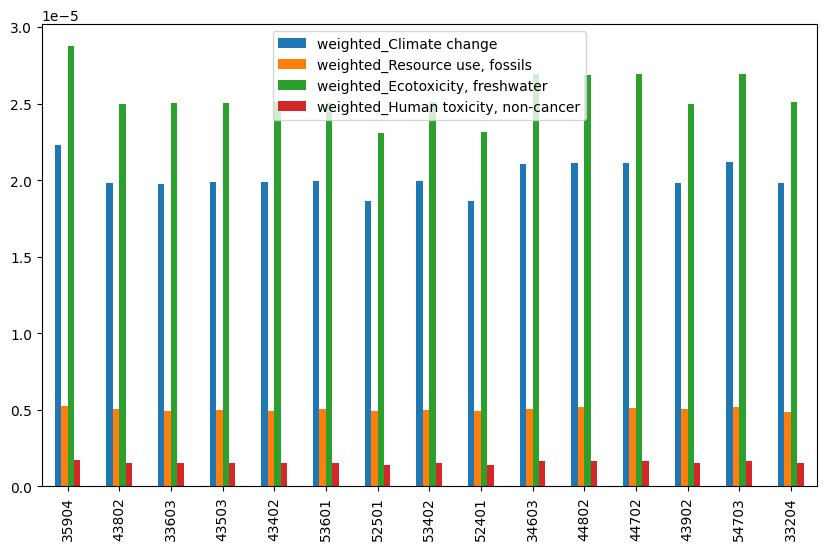

In [ ]:
#best_tiles_LCA_plot = data_LCA_selected[['weighted_Climate change','weighted_Resource use, fossils','weighted_Ecotoxicity, freshwater','weighted_Human toxicity, non-cancer']]
best_tiles_LCA_plot = data_LCA_selected[['weighted_Climate change','weighted_Resource use, fossils','weighted_Ecotoxicity, freshwater','weighted_Human toxicity, non-cancer']].sample(n=15)
best_tiles_LCA_plot.plot(kind='bar', figsize=(10, 6))

In [ ]:
data_LCA_climate = pd.DataFrame()

data_LCA_climate['Sand']=data_LCA['m_sand']*LCA_source.loc[5, 'Climate change']
data_LCA_climate['Oil']=data_LCA['m_oil']*LCA_source.loc[2, 'Climate change']
data_LCA_climate['Catalyst']=data_LCA['m_cat']*LCA_source.loc[8, 'Climate change']
data_LCA_climate['Curing']=data_LCA['E_curing']*LCA_source.loc[11, 'Climate change']

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x78370c254820> (for post_execute):


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

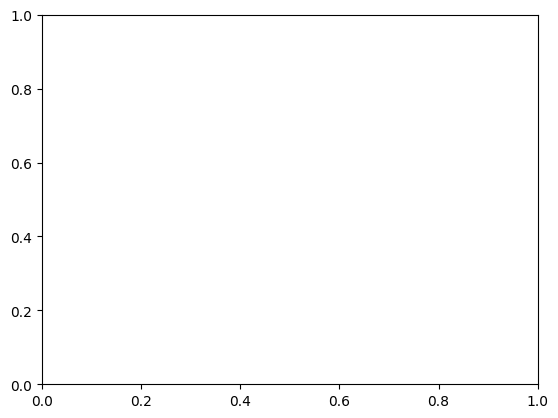

In [ ]:
plt.figure(figsize=(10, 6))
data_LCA_climate[['Sand','Oil','Catalyst','Curing']].plot(kind='bar')

In [ ]:
#Create a plot from a selected number of impact categories of the best tiles
columns_to_plot = ['Column1', 'Column2', 'Column3']
selected_data = best_tiles_LCA[columns_to_plot]

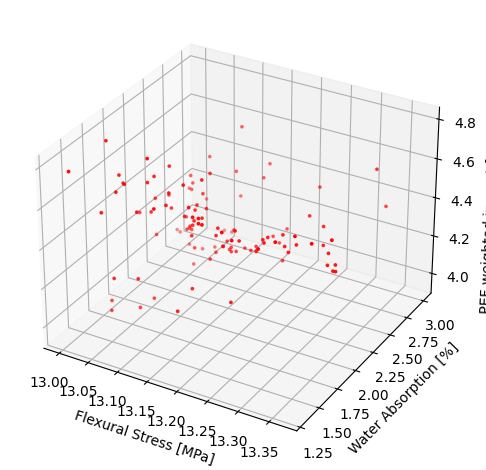

In [ ]:
from matplotlib.ticker import ScalarFormatter
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
#ax.scatter(data_LCA_high['Flexural Stress'], data_LCA_high['Water Absorption'], data_LCA_high['Weighted_sum'], s=1, color='blue', alpha=0.3)
ax.scatter(best_tiles_LCA['Flexural Stress'], best_tiles_LCA['Water Absorption'], best_tiles_LCA['Weighted_sum'], s=3, color='red')


# Set labels
ax.set_xlabel('Flexural Stress [MPa]')
ax.set_ylabel('Water Absorption [%]')
ax.set_zlabel('PEF weighted impact [per person]')


# Set scientific notation for the z-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax.zaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
stress_10_max = (data_LCA_opt['Flexural Stress'].max()-data_LCA_opt['Flexural Stress'].min())*0.5
water_10_min = (data_LCA_opt['Water Absorption'].max()-data_LCA_opt['Water Absorption'].min())*0.1
impact_10_min = (data_LCA_opt['Weighted_sum'].max())*0.3

data_LCA_best = data_LCA_opt[(data_LCA_opt['Flexural Stress'] > stress_10_max) & (data_LCA_opt['Weighted_sum'] < impact_10_min)]
data_LCA_best

,Flexural Stress,Water Absorption,Characteristic_Climate change,Weighted_sum


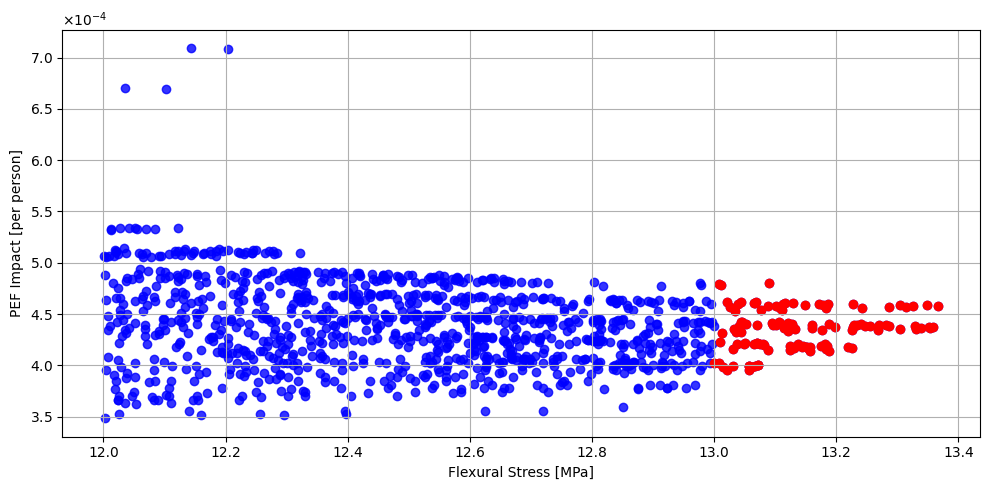

In [ ]:
data_LCA_high = data_LCA_opt[(data_LCA_opt['Flexural Stress'] > 12.00) & (data_LCA_opt['Water Absorption'] < 3.00)]

plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
plt.scatter(data_LCA_high['Flexural Stress'], data_LCA_high['Weighted_sum'], color='blue', alpha=0.8)
plt.scatter(best_tiles_LCA['Flexural Stress'], best_tiles_LCA['Weighted_sum'], color='red')
best_tiles_LCA
plt.xlabel('Flexural Stress [MPa]')
plt.ylabel('PEF Impact [per person]')

# Set scientific notation for the y-axis tick labels
ax = plt.gca()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

plt.title('')
plt.grid(True)
plt.tight_layout()
plt.savefig('LCA_opt.png', dpi=300)
plt.show()


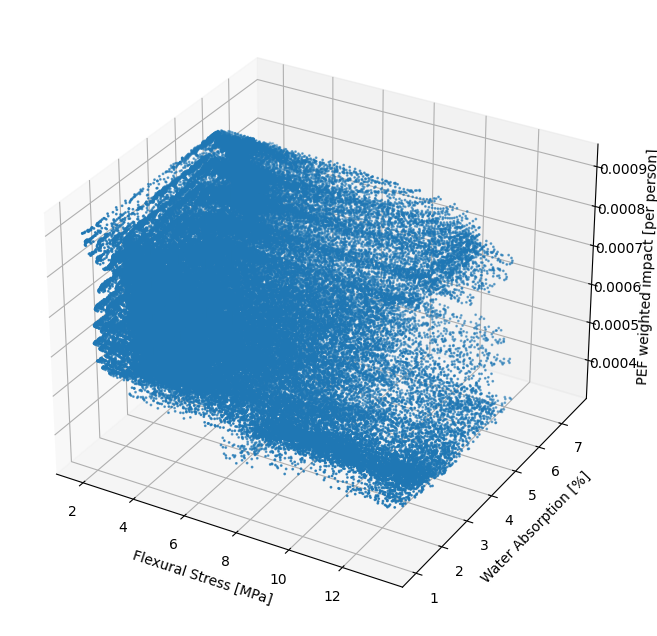

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D





# Create a larger figure
fig = plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data_LCA_opt['Flexural Stress'], data_LCA['Water Absorption'], data_LCA['Weighted_sum'], s=1)

# Set labels
ax.set_xlabel('Flexural Stress [MPa]')
ax.set_ylabel('Water Absorption [%]')
ax.set_zlabel('PEF weighted impact [per person]')

# Show the plot
plt.show()


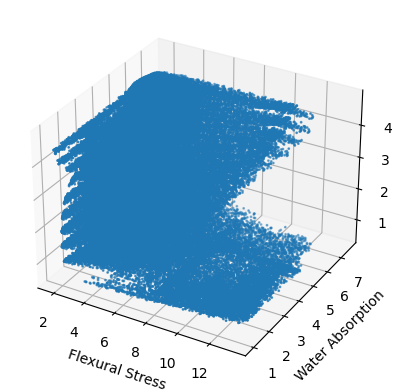

In [ ]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data_LCA_opt['Flexural Stress'], data_LCA['Water Absorption'], data_LCA['Characteristic_Climate change'], s=1)

# Set labels
ax.set_xlabel('Flexural Stress')
ax.set_ylabel('Water Absorption')
ax.set_zlabel('Characteristic_Climate change')

# Show the plot
plt.show()

### Identifying the pareto front

In [ ]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=db14b02723793ddd70bfa0f36f5d5fccb72543e7036991bb313fdb0fd0ace26f
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
data = pd.read_csv('data_LCA_opt.csv')

In [ ]:
data.head()

,Flexural Stress,Water Absorption,Characteristic_Climate change,Weighted_sum
0,6.597707,4.446577,0.558158,0.000341
1,6.606778,4.452066,0.558158,0.000341
2,6.920568,4.457358,0.558158,0.000341
3,7.960255,4.462464,0.558158,0.000341
4,11.219010,4.467393,0.558158,0.000341


In [ ]:

import numpy as np
import pymoo
#from pymoo.algorithms.nsga2 import NSGA2
#from pymoo.factory import get_problem
#from pymoo.model.problem import Problem
#from pymoo.optimize import minimize


In [ ]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

In [ ]:
class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=3,
                         n_obj=2,
                         xl=-2.0,
                         xu=2.0)

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[:, 0]**2 + x[:, 1]**2)
        f2 = (x[:, 0]-1)**2 + x[:, 1]**2
        out["F"] = np.column_stack([f1, f2])

In [ ]:
np.min(data, axis=0)

Flexural Stress                  1.776078
Water Absorption                 0.969198
Characteristic_Climate change    0.557393
Weighted_sum                     0.000339
dtype: float64

In [ ]:
# Define your custom problem class
class MyProblem(Problem):
    def __init__(self, data):
        super().__init__(n_var=data.shape[1],
                         n_obj=2,
                         n_constr=0,
                         xl=np.min(data, axis=0),
                         xu=np.max(data, axis=0))
        self.data = data

    def _evaluate(self, x, out, *args, **kwargs):
        # Calculate the objectives
        flexural_stress = x[:, 0]
        Weighted_sum = x[:, 3]

        # Maximize 'Flexural stress' and minimize 'Weighted_sum'
        out["F"] = np.column_stack((-flexural_stress, Weighted_sum))

In [ ]:
# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
data = data

# Instantiate your custom problem class
problem = MyProblem(data.values)

# Define the genetic algorithm (NSGA-II)
algorithm = NSGA2(pop_size=100)

# Perform optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               verbose=False)

# Get the Pareto front solutions
pareto_front = res.F

# Print the Pareto front solutions
print("Pareto Front Solutions:")
for solution in pareto_front:
    print(solution)


Pareto Front Solutions:
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.39443130e-04]
[-1.33670957e+01  3.3944

In [ ]:
result = data[(data['Flexural Stress'].astype(str).str[:4] == str(13.36))]
result


,Flexural Stress,Water Absorption,Characteristic_Climate change,Weighted_sum


In [ ]:
result = data[(data['Flexural Stress'] >= 13.36)]
result

,Flexural Stress,Water Absorption,Characteristic_Climate change,Weighted_sum
53901,13.367096,1.860141,0.714047,0.000458


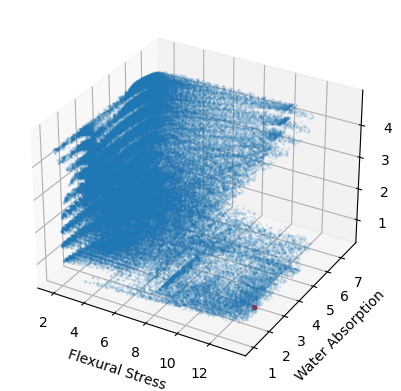

In [ ]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data_LCA_opt['Flexural Stress'], data_LCA['Water Absorption'], data_LCA['Characteristic_Climate change'], s=1, alpha = 0.1)
ax.scatter(13.36709572,1.860141,0.96919795, color = 'red', s=10)

# Set labels
ax.set_xlabel('Flexural Stress')
ax.set_ylabel('Water Absorption')
ax.set_zlabel('Characteristic_Climate change')

# Show the plot
plt.show()

## Visualizations used in the article

In [ ]:
#Descriptive statistics for the dataset:

desc = data.describe()
desc_rounded = desc.round(1)
latex_table = desc_rounded.to_latex()
print(latex_table)

In [ ]:
#Loading the dateset
data = pd.read_excel("vegetile_data.xlsx")
data.info()


data.hist(bins=50, figsize=(10,10))
plt.tight_layout()
plt.savefig('histogram.png', dpi=300)

In [ ]:
#Global feature importance calculation for Flexural Stress:

#import and setup the random forest regressor model:
from sklearn.ensemble import RandomForestRegressor
model_rfr_importance = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, min_samples_leaf=2)

#add random variable to the dataset
data_input["RANDOM"] = np.random.RandomState(42).randn(data_input.shape[0])

#run the random forest regressor on the dataset:
model_rfr_importance.fit(data_input, data_output_stress)

#plot the feature importance:
global_importances_random = pd.Series(model_rfr_importance.feature_importances_, index=data_input.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
global_importances_random.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance in Flexural stress")
plt.axvline(x=global_importances_random['RANDOM'], color='red', linestyle='--')
plt.tight_layout()
plt.savefig('feature_stress.png', dpi=300)

In [ ]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

In [ ]:
#Load datasets, models and calculate predictions

#Load the data:
data_input_train = pd.read_csv("data_input_train.csv")
data_output_stress_train = pd.read_csv('data_output_stress_train.csv').values.ravel()
data_output_water_train = pd.read_csv('data_output_water_train.csv').values.ravel()

data_input_test = pd.read_csv("data_input_test.csv")
data_output_stress_test = pd.read_csv('data_output_stress_test.csv').values.ravel()
data_output_water_test = pd.read_csv('data_output_water_test.csv').values.ravel()

In [ ]:
#Load the models:
model_stress_RFR = joblib.load('random_forest_model_stress_trained.joblib')
model_stress_MLP = joblib.load('MLP_model_stress_trained.joblib')
model_water_RFR = joblib.load('random_forest_model_water_trained.joblib')
model_water_MLP = joblib.load('MLP_model_water_trained.joblib')


In [ ]:
#Calculate the predictions
data_pred_stress_RFR_train = model_stress_RFR.predict(data_input_train)
data_pred_stress_RFR_test = model_stress_RFR.predict(data_input_test)

data_pred_stress_MLP_train = model_stress_MLP.predict(data_input_train)
data_pred_stress_MLP_test = model_stress_MLP.predict(data_input_test)

data_pred_water_RFR_train = model_water_RFR.predict(data_input_train)
data_pred_water_RFR_test = model_water_RFR.predict(data_input_test)

data_pred_water_MLP_train = model_water_MLP.predict(data_input_train)
data_pred_water_MLP_test = model_water_MLP.predict(data_input_test)

In [ ]:
#Calculate model metrics on the test dataset:

rmse_stress_RFR = np.sqrt(mean_squared_error(data_output_stress_test, data_pred_stress_RFR_test))
aard_stress_RFR = np.mean(np.abs((data_output_stress_test - data_pred_stress_RFR_test) / data_output_stress_test))
r2_stress_RFR = r2_score(data_output_stress_test, data_pred_stress_RFR_test)

rmse_stress_MLP = np.sqrt(mean_squared_error(data_output_stress_test, data_pred_stress_MLP_test))
aard_stress_MLP = np.mean(np.abs((data_output_stress_test - data_pred_stress_MLP_test) / data_output_stress_test))
r2_stress_MLP = r2_score(data_output_stress_test, data_pred_stress_MLP_test)

rmse_water_RFR = np.sqrt(mean_squared_error(data_output_water_test, data_pred_water_RFR_test))
aard_water_RFR = np.mean(np.abs((data_output_water_test - data_pred_water_RFR_test) / data_output_water_test))
r2_water_RFR = r2_score(data_output_water_test, data_pred_water_RFR_test)

rmse_water_MLP = np.sqrt(mean_squared_error(data_output_water_test, data_pred_water_MLP_test))
aard_water_MLP = np.mean(np.abs((data_output_water_test - data_pred_water_MLP_test) / data_output_water_test))
r2_water_MLP = r2_score(data_output_water_test, data_pred_water_MLP_test)


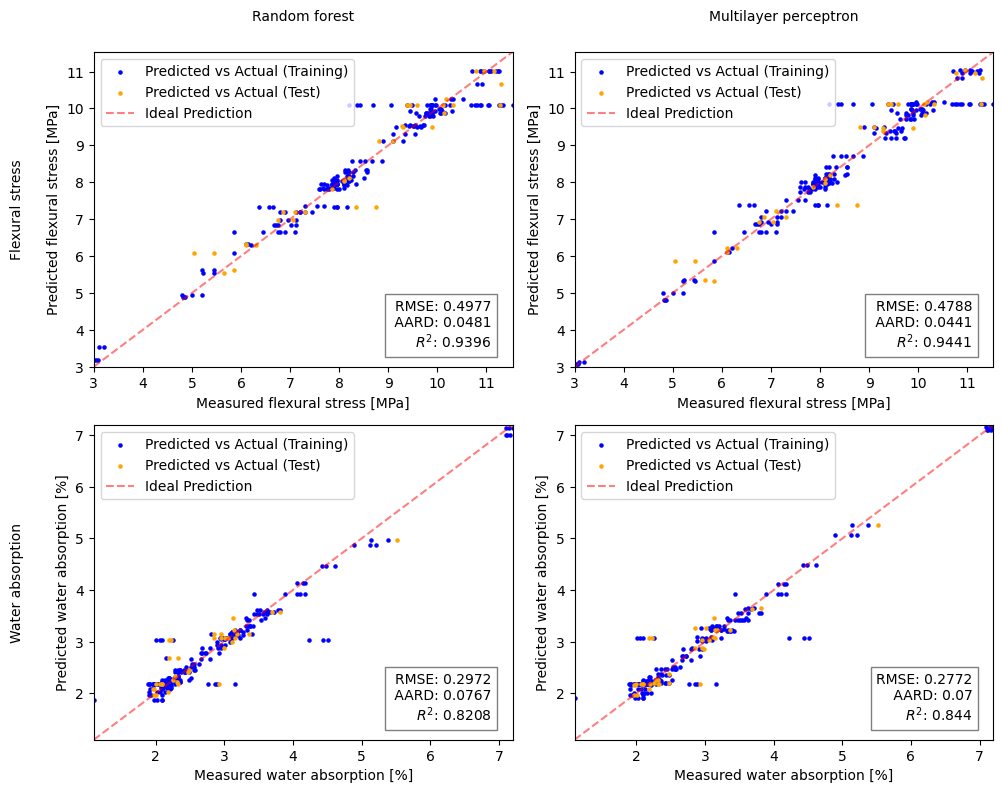

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatterplot on each subplot
axs[0, 0].scatter(data_output_stress_train, data_pred_stress_RFR_train, s=5, c='blue', alpha=1, label='Predicted vs Actual (Training)')
axs[0, 0].scatter(data_output_stress_test, data_pred_stress_RFR_test, s=5, c='orange', alpha=1, label='Predicted vs Actual (Test)')
axs[0, 0].plot([data_output_stress_train.min(),data_output_stress_train.max()],
               [data_output_stress_train.min(),data_output_stress_train.max()],
               linestyle='--', c='red', alpha=0.5, label='Ideal Prediction')

#plt.scatter(data_output_stress_train, data_pred_stress_train, color='blue', label='Predicted vs Actual (Training)')
#plt.scatter(data_output_stress_test, data_pred_stress_test, color='orange', label='Predicted vs Actual (Test)')
#plt.plot(data_output_stress_train, data_output_stress_train, color='red', linestyle='--', label='Ideal Prediction')

axs[0, 1].scatter(data_output_stress_train, data_pred_stress_MLP_train, s=5, c='blue', alpha=1, label='Predicted vs Actual (Training)')
axs[0, 1].scatter(data_output_stress_test, data_pred_stress_MLP_test, s=5, c='orange', alpha=1, label='Predicted vs Actual (Test)')
axs[0, 1].plot([data_output_stress_train.min(),data_output_stress_train.max()],
               [data_output_stress_train.min(),data_output_stress_train.max()],
               linestyle='--', c='red', alpha=0.5, label='Ideal Prediction')

axs[1, 0].scatter(data_output_water_train, data_pred_water_RFR_train, s=5, c='blue', alpha=1, label='Predicted vs Actual (Training)')
axs[1, 0].scatter(data_output_water_test, data_pred_water_RFR_test, s=5, c='orange', alpha=1, label='Predicted vs Actual (Test)')
axs[1, 0].plot([data_output_water_train.min(),data_output_water_train.max()],
               [data_output_water_train.min(),data_output_water_train.max()],
               linestyle='--', c='red', alpha=0.5, label='Ideal Prediction')

axs[1, 1].scatter(data_output_water_train, data_pred_water_MLP_train, s=5, c='blue', alpha=1, label='Predicted vs Actual (Training)')
axs[1, 1].scatter(data_output_water_test, data_pred_water_MLP_test, s=5, c='orange', alpha=1, label='Predicted vs Actual (Test)')
axs[1, 1].plot([data_output_water_train.min(),data_output_water_train.max()],
               [data_output_water_train.min(),data_output_water_train.max()],
               linestyle='--', c='red', alpha=0.5, label='Ideal Prediction')

# Add axis labels and dimensions
axs[0, 0].set_xlabel('Measured flexural stress [MPa]')
axs[0, 0].set_ylabel('Predicted flexural stress [MPa]')
axs[0, 0].set_xlim(data_output_stress_train.min(), data_output_stress_train.max())
axs[0, 0].set_ylim(data_output_stress_train.min(), data_output_stress_train.max())

axs[0, 1].set_xlabel('Measured flexural stress [MPa]')
axs[0, 1].set_ylabel('Predicted flexural stress [MPa]')
axs[0, 1].set_xlim(data_output_stress_train.min(), data_output_stress_train.max())
axs[0, 1].set_ylim(data_output_stress_train.min(), data_output_stress_train.max())

axs[1, 0].set_xlabel('Measured water absorption [%]')
axs[1, 0].set_ylabel('Predicted water absorption [%]')
axs[1, 0].set_xlim(data_output_water_train.min(), data_output_water_train.max())
axs[1, 0].set_ylim(data_output_water_train.min(), data_output_water_train.max())

axs[1, 1].set_xlabel('Measured water absorption [%]')
axs[1, 1].set_ylabel('Predicted water absorption [%]')
axs[1, 1].set_xlim(data_output_water_train.min(), data_output_water_train.max())
axs[1, 1].set_ylim(data_output_water_train.min(), data_output_water_train.max())


# Add legend to each subplot
axs[0, 0].legend(loc='upper left')
axs[0, 1].legend(loc='upper left')
axs[1, 0].legend(loc='upper left')
axs[1, 1].legend(loc='upper left')

# Add metrics to each subplot
metrics_stress_RFR = f"RMSE: {rmse_stress_RFR.round(4)}\n AARD: {aard_stress_RFR.round(4)}\n $R^2$: {r2_stress_RFR.round(4)}"
metrics_stress_MLP = f"RMSE: {rmse_stress_MLP.round(4)}\n AARD: {aard_stress_MLP.round(4)}\n $R^2$: {r2_stress_MLP.round(4)}"
metrics_water_RFR = f"RMSE: {rmse_water_RFR.round(4)}\n AARD: {aard_water_RFR.round(4)}\n $R^2$: {r2_water_RFR.round(4)}"
metrics_water_MLP = f"RMSE: {rmse_water_MLP.round(4)}\n AARD: {aard_water_MLP.round(4)}\n $R^2$: {r2_water_MLP.round(4)}"

axs[0, 0].text(0.95, 0.05, metrics_stress_RFR, horizontalalignment='right', verticalalignment='bottom',
               transform=axs[0, 0].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
axs[0, 1].text(0.95, 0.05, metrics_stress_MLP, horizontalalignment='right', verticalalignment='bottom',
               transform=axs[0, 1].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
axs[1, 0].text(0.95, 0.05, metrics_water_RFR, horizontalalignment='right', verticalalignment='bottom',
               transform=axs[1, 0].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
axs[1, 1].text(0.95, 0.05, metrics_water_MLP, horizontalalignment='right', verticalalignment='bottom',
               transform=axs[1, 1].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


# Add text on the left side as column names
axs[0, 0].text(-0.2, 0.5, 'Flexural stress', va='center', rotation='vertical', transform=axs[0, 0].transAxes)
axs[1, 0].text(-0.2, 0.5, 'Water absorption', va='center', rotation='vertical', transform=axs[1, 0].transAxes)

# Add text on the top as row names
axs[0, 0].text(0.5, 1.1, 'Random forest', ha='center', transform=axs[0, 0].transAxes)
axs[0, 1].text(0.5, 1.1, 'Multilayer perceptron', ha='center', transform=axs[0, 1].transAxes)

# Remove x and y ticks
#for ax in axs.flat:
#    ax.set(xticks=[], yticks=[])

for ax in axs.flat:
    ax.grid(False)

plt.tight_layout()


plt.savefig('predictions.png', dpi=300)

plt.show()

In [ ]:
#Calculate the residuals:

resid_stress_RFR_train = data_pred_stress_RFR_train - data_output_stress_train
resid_stress_RFR_test = data_pred_stress_RFR_test - data_output_stress_test

resid_stress_MLP_train = data_pred_stress_MLP_train - data_output_stress_train
resid_stress_MLP_test = data_pred_stress_MLP_test - data_output_stress_test

resid_water_RFR_train = data_pred_water_RFR_train - data_output_water_train
resid_water_RFR_test = data_pred_water_RFR_test - data_output_water_test

resid_water_MLP_train = data_pred_water_MLP_train - data_output_water_train
resid_water_MLP_test = data_pred_water_MLP_test - data_output_water_test

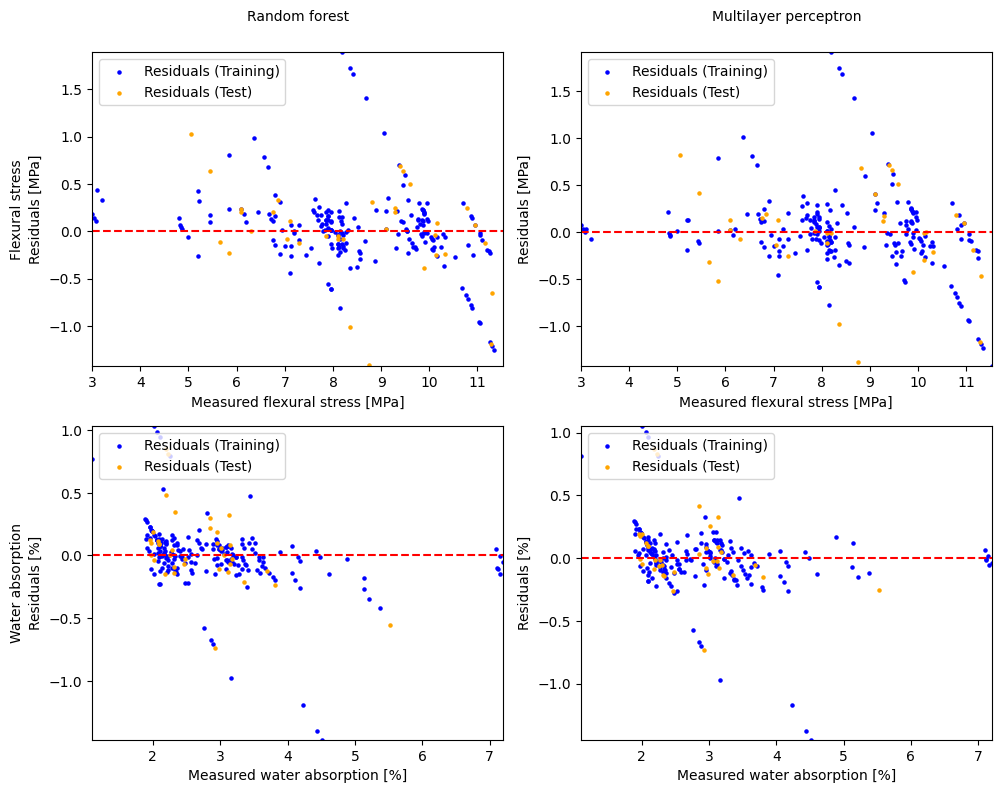

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatterplot on each subplot
axs[0, 0].scatter(data_output_stress_train, resid_stress_RFR_train, s=5, c='blue', alpha=1, label='Residuals (Training)')
axs[0, 0].scatter(data_output_stress_test, resid_stress_RFR_test, s=5, c='orange', alpha=1, label='Residuals (Test)')
axs[0, 0].axhline(y=0, color='red', linestyle='--')

axs[0, 1].scatter(data_output_stress_train, resid_stress_MLP_train, s=5, c='blue', alpha=1, label='Residuals (Training)')
axs[0, 1].scatter(data_output_stress_test, resid_stress_MLP_test, s=5, c='orange', alpha=1, label='Residuals (Test)')
axs[0, 1].axhline(y=0, color='red', linestyle='--')

axs[1, 0].scatter(data_output_water_train, resid_water_RFR_train, s=5, c='blue', alpha=1, label='Residuals (Training)')
axs[1, 0].scatter(data_output_water_test, resid_water_RFR_test, s=5, c='orange', alpha=1, label='Residuals (Test)')
axs[1, 0].axhline(y=0, color='red', linestyle='--')

axs[1, 1].scatter(data_output_water_train, resid_water_MLP_train, s=5, c='blue', alpha=1, label='Residuals (Training)')
axs[1, 1].scatter(data_output_water_test, resid_water_MLP_test, s=5, c='orange', alpha=1, label='Residuals (Test)')
axs[1, 1].axhline(y=0, color='red', linestyle='--')

# Add axis labels and dimensions
axs[0, 0].set_xlabel('Measured flexural stress [MPa]')
axs[0, 0].set_ylabel('Residuals [MPa]')
axs[0, 0].set_xlim(data_output_stress_train.min(), data_output_stress_train.max())
axs[0, 0].set_ylim(resid_stress_MLP_train.min(), resid_stress_RFR_train.max())

axs[0, 1].set_xlabel('Measured flexural stress [MPa]')
axs[0, 1].set_ylabel('Residuals [MPa]')
axs[0, 1].set_xlim(data_output_stress_train.min(), data_output_stress_train.max())
axs[0, 1].set_ylim(resid_stress_MLP_train.min(), resid_stress_MLP_train.max())

axs[1, 0].set_xlabel('Measured water absorption [%]')
axs[1, 0].set_ylabel('Residuals [%]')
axs[1, 0].set_xlim(data_output_water_train.min(), data_output_water_train.max())
axs[1, 0].set_ylim(resid_water_RFR_train.min(), resid_water_RFR_train.max())

axs[1, 1].set_xlabel('Measured water absorption [%]')
axs[1, 1].set_ylabel('Residuals [%]')
axs[1, 1].set_xlim(data_output_water_train.min(), data_output_water_train.max())
axs[1, 1].set_ylim(resid_water_MLP_train.min(), resid_water_MLP_train.max())


# Add legend to each subplot
axs[0, 0].legend(loc='upper left')
axs[0, 1].legend(loc='upper left')
axs[1, 0].legend(loc='upper left')
axs[1, 1].legend(loc='upper left')


# Add text on the left side as column names
axs[0, 0].text(-0.2, 0.5, 'Flexural stress', va='center', rotation='vertical', transform=axs[0, 0].transAxes)
axs[1, 0].text(-0.2, 0.5, 'Water absorption', va='center', rotation='vertical', transform=axs[1, 0].transAxes)

# Add text on the top as row names
axs[0, 0].text(0.5, 1.1, 'Random forest', ha='center', transform=axs[0, 0].transAxes)
axs[0, 1].text(0.5, 1.1, 'Multilayer perceptron', ha='center', transform=axs[0, 1].transAxes)

# Remove x and y ticks
#for ax in axs.flat:
#    ax.set(xticks=[], yticks=[])

for ax in axs.flat:
    ax.grid(False)

plt.tight_layout()

plt.savefig('residuals.png', dpi=300)

plt.show()
